# Laptop Price Analysis and Modeling

Laptop sudah menjadi salah satu kebutuhan primer di kalangan umum saat ini. Perkembangan digital yang cepat dan dinamis mengakibatkan kepemilikan laptop sudah menjadi sebuah kewajiban. Saat membeli laptop, ada banyak komponen/fitur yang akan mempengaruhi harga total dari laptop tersebut seperti CPU, GPU, dll. Maka dari itu, ada baiknya jika kita tahu pengaruh setiap komponen-komponen ini kepada harga laptop. Dari informasi tersebut kita bisa mengetahui beberapa hal seperti komponen yang paling mempengaruhi harga laptop, estimasi harga suatu komponen tertentu, bahkan estimasi harga total laptop berdasarkan komponen-komponen yang digunakan. 

Pada notebook ini akan dilakukan analisis dan pemodelan terkait komponen/fitur yang mempengaruhi harga laptop yang dijual di pasaran. Tujuan dari notebook ini adalah menganalisis fitur yang paling mempengaruhi harga laptop serta melakukan pemodelan untuk memperkirakan harga laptop berdasarkan fitur-fitur laptop yang ada di dataset.

**Catatan:** dalam notebook ini fitur dan komponen memiliki arti yang sama.

## About Dataset

- **Company:** Perusahaan produsen
- **Product:** Brand dan model
- **TypeName:** Tipe laptop (Notebook, Gaming, dll.) 
- **Inches:** Ukuran layar
- **ScreenResolution:** Resolusi layar
- **Cpu:** Central Processing Unit (CPU)
- **Ram:** Ukuran RAM laptop 
- **Memory:** Ukuran & tipe memori laptop (HDD, SSD, dll.) 
- **GPU:** Graphics Processing Units (GPU)
- **OpSys:** Sistem operasi
- **Weight:** Berat laptop
- **Price_euros:** Harga laptop (€)

## Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
import re

warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', None)

## Load Dataset

In [2]:
df = pd.read_csv('laptop_price.csv')

## Data Overview & Preprocessing

Berikut ini adalah 5 baris pertama dari dataset yang digunakan pada analisis notebook ini.

In [3]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


- ### Missing Data

In [5]:
print('Jumlah baris dengan missing data pada dataset: {}'.format(df.isna().sum().sum()))

Jumlah baris dengan missing data pada dataset: 0


- ### Duplicated Data

In [6]:
print('Jumlah baris dengan data duplikat pada dataset: {}'.format(df.duplicated().sum()))

Jumlah baris dengan data duplikat pada dataset: 0


- ### Statistical Summary

Selanjutnya, akan dipisahkan variabel numerik dan kategorial

In [7]:
cat_cols = df.select_dtypes(['O']).columns.tolist()
num_cols = [cols for cols in df.columns.tolist() if cols not in cat_cols]

In [8]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
laptop_ID,1303.0,660.155794,381.172104,1.0,331.5,659.0,990.50,1320.0
Inches,1303.0,15.017191,1.426304,10.1,14.0,15.6,15.60,18.4
Price_euros,1303.0,1123.686992,699.009043,174.0,599.0,977.0,1487.88,6099.0


**Key Points:**
- Median harga laptop ada di angka €977
- Laptop termahal di dataset seharga €6099 berada jauh diatas 75-persentil

In [9]:
df[cat_cols].describe()

,Company,Product,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
count,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303
unique,19,618,6,40,118,9,39,110,9,179
top,Lenovo,XPS 13,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg
freq,297,30,727,507,190,619,412,281,1072,121


**Key Points:**
- Terdapat modifikasi melalui Feature Engineering yang dapat dilakukan terhadap beberapa fitur ini:
    - Product, ScreenResolution, Cpu, Memory, Gpu dapat dimodifikasi dan digrouping karena banyaknya nilai unik (*high cardinality*) dalam fitur-fitur tersebut.
    - Ram dan Weight dapat diubah tipe datanya menjadi numerik.

## Feature Engineering

- ### Product

In [10]:
df['Product'].value_counts(normalize=True) * 100

XPS 13                                  2.302379
Inspiron 3567                           2.225633
250 G6                                  1.611665
Vostro 3568                             1.458173
Legion Y520-15IKBN                      1.458173
                                          ...   
X541NA (N3350/4GB/1TB/Linux)            0.076746
15-bw011nv (A6-9220/4GB/1TB/FHD/W10)    0.076746
Swift 7                                 0.076746
Latitude 3570                           0.076746
GT62VR 7RE                              0.076746
Name: Product, Length: 618, dtype: float64

Fitur **`Product`** memiliki *cardinality* yang tinggi pada dataset ini, dengan jumlah 618 nilai unik. **`Product`** terbesar adalah XPS 13 dengan persentase hanya 2.3% dari total **`Product`** yang ada. Karena besarnya *cardinality* fitur ini, maka fitur ini dapat dipertimbangkan untuk dibuang dari analisis dan pemodelan.

- ### Screen Resolution

In [11]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
Touchscreen 2256x1504                              6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2304x1440                 6
IPS Panel Touchscreen 2560x1440               

Dari fitur **`ScreenResolution`** ini akan dibuat beberapa fitur baru yaitu:
- Ukuran resolusi layar
- Adanya fitur *IPS / IPS Retina Display* pada layar
- Adanya fitur *Touchscreen* pada layar

menggunakan beberapa *function* di bawah ini.

In [12]:
#screen resolution size
def regex_reso(row):
    txt = row
    x = re.search(r"[0-9]+x[0-9]+", txt)
    return x[0]

#IPS feature
def find_ips(row):
    if row.find('IPS') > -1:
        return 1
    else:
        return 0

#Touchscreen feature
def find_touchscreen(row):
    if row.find('Touchscreen') > -1:
        return 1
    else:
        return 0

def new_column(new, col, func, df):
    df[new] = 0
    df[new] = df[col].apply(func)

In [13]:
col = 'ScreenResolution'
new_column('Resolution', col, regex_reso, df)
new_column('IPS', col, find_ips, df)
new_column('Touchscreen', col, find_touchscreen, df)

Berikut ini adalah sampel hasil dari modifikasi fitur **`ScreenResolution`**.

In [14]:
df[['ScreenResolution', 'Resolution', 'IPS', 'Touchscreen']].sample(5)

,ScreenResolution,Resolution,IPS,Touchscreen
432,IPS Panel Full HD 1920x1080,1920x1080,1,0
497,Full HD 1920x1080,1920x1080,0,0
145,Full HD 1920x1080,1920x1080,0,0
99,IPS Panel Full HD 1920x1080,1920x1080,1,0
1272,1366x768,1366x768,0,0


- ### CPU

In [15]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz              190
Intel Core i7 7700HQ 2.8GHz             146
Intel Core i7 7500U 2.7GHz              134
Intel Core i7 8550U 1.8GHz               73
Intel Core i5 8250U 1.6GHz               72
                                       ... 
Intel Core i5 6260U 1.8GHz                1
AMD A9-Series 9420 2.9GHz                 1
Intel Pentium Dual Core 4405U 2.1GHz      1
Intel Core M 6Y54 1.1GHz                  1
Intel Core i5 2.0GHz                      1
Name: Cpu, Length: 118, dtype: int64

Dari fitur **`Cpu`** ini dapat dibuat fitur baru yaitu:
- Kecepatan processor dalam satuan GHz
- Brand dari CPU

Dengan menggunakan regex, fitur kecepatan processor akan diekstrak dari fitur **`Cpu`**. Setelah itu, tipe data akan diubah menjadi numerik.

In [16]:
df['Cpu_GHz'] = df['Cpu'].str.extract(r'(\d+\.*\d*GHz)')
df['Cpu_GHz'] = df['Cpu_GHz'].str.replace('GHz', '')
df['Cpu_GHz'] = df['Cpu_GHz'].astype(float)

Setelah itu, kecepatan processor akan dibuang dari fitur **`Cpu`**.

In [17]:
df['Cpu'] = df['Cpu'].str.replace(r'(\d+\.*\d*GHz)', '', regex=True)

Selanjutnya fitur **`Cpu`** akan diekstrak dan dikelompokan ke dalam beberapa brand (atau sub-brand) yang lebih umum untuk mengurangi jumlah nilai unik pada fitur ini.

In [18]:
list_brandcpu = []
for i in range(df.shape[0]):
    if (df['Cpu'][i].find('Intel Core i') != -1) & (len(re.findall(r'([0-9]\d+)', df['Cpu'][i])) != 0):
        brand = df['Cpu'][i].replace(re.findall(r'([0-9]\d+)', df['Cpu'][i])[0], '')
        try:
            brand = brand.replace(re.findall(r'  ', df['Cpu'][i])[0], ' ')
        except:
            brand = brand
    elif df['Cpu'][i].find('Intel Core ') != -1:
        brand = re.findall(r'(\w+\s\w+\s\w+)', df['Cpu'][i])[0]
    elif df['Cpu'][i].find('Ryzen') != -1:
        brand = 'AMD Ryzen'
    elif df['Cpu'][i].find('AMD') != -1:
        brand = 'AMD'
    else:
        brand = re.findall(r'(\w+\s\w+)', df['Cpu'][i])[0]
    
    if (brand.strip() == 'Intel Core i5') | (brand.strip() == 'Intel Core i5 7Y'):
        brand = 'Intel Core i5 HQ'
    elif (brand.strip() == 'Intel Core i7') | (brand.strip() == 'Intel Core i7 7Y'):
        brand = 'Intel Core i7 HQ' 
    
    list_brandcpu.append(brand.strip())

df['Cpu_brand'] = list_brandcpu

In [19]:
df['Cpu_brand'].value_counts()

Intel Core i5 U     360
Intel Core i7 U     298
Intel Core i7 HQ    212
Intel Core i3 U     136
Intel Celeron        88
Intel Core i5 HQ     63
AMD                  58
Intel Pentium        30
Intel Core M         19
Intel Core i7 HK     17
Intel Atom           13
Intel Xeon            4
AMD Ryzen             4
Samsung Cortex        1
Name: Cpu_brand, dtype: int64

Dari 118 nilai unik fitur **`Cpu`** yang sebelumnya ada pada dataset, dihasilkan 14 kelompok brand & sub-brand CPU baru pada fitur **`Cpu_brand`**

Berikut ini adalah sampel hasil dari modifikasi fitur **`Cpu`**.

In [20]:
df[['Cpu', 'Cpu_GHz', 'Cpu_brand']].sample(5)

,Cpu,Cpu_GHz,Cpu_brand
366,Intel Core i5 8250U,1.60,Intel Core i5 U
1120,Intel Atom X5-Z8350,1.44,Intel Atom
1023,Intel Core i7 7500U,2.70,Intel Core i7 U
604,Intel Core i3 6006U,2.00,Intel Core i3 U
315,Intel Core i5 8250U,1.60,Intel Core i5 U


- ### RAM

In [21]:
df['Ram'].value_counts()

8GB     619
4GB     375
16GB    200
6GB      41
12GB     25
2GB      22
32GB     17
24GB      3
64GB      1
Name: Ram, dtype: int64

Fitur **`Ram`** masih dalam tipe data kategori, maka dari itu fitur akan diubah ke tipe data numerik.

In [22]:
df['Ram'] = df['Ram'].str.replace('GB', '')
df['Ram'] = df['Ram'].astype(int)

- ### Memory

In [23]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
128GB SSD +  2TB HDD               2
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
256GB SSD +  256GB SSD             2
8GB SSD                            1
5

Dari fitur **`Memory`** ini dapat dibuat beberapa fitur baru yaitu:
- Jenis memori utama (SSD, HDD, Hybrid, Flash)
- Ukuran memori utama (GB)
- Jenis memori tambahan (SSD, HDD, Hybrid, Flash)
- Ukuran memori tambahan (GB)

Pertama, akan dilakukan manipulasi string agar lebih mudah melakukan format dan ekstrak data dari fitur **`Memory`**.

In [24]:
memory = df['Memory'].apply(lambda x: x.replace('.0','').replace('TB','000GB').replace('GB',''))

Dengan menggunakan regex dan manipulasi string, akan diekstrak empat fitur baru seperti yang telah dijelaskan diatas dari fitur **`Memory`**

In [29]:
list_m1 = []
list_ssd1 = [0] * df.shape[0]
list_hdd1 = [0] * df.shape[0]
list_hybrid1 = [0] * df.shape[0]
list_flash1 = [0] * df.shape[0]
list_m2 = []
list_m2gb = [0] * df.shape[0]

for i in range(df.shape[0]):
    
    memory1 = memory[i].split('+')[0]
    
    m1 = re.findall(r"[a-zA-Z]+\s*[a-zA-Z]+", memory1)
    m1 = m1[0]
    list_m1.append(m1)
    
    gb1 = re.findall(r"[0-9]+", memory1)
    gb1 = sum(list(map(int, gb1)))
    
    if m1 == 'SSD':
        list_ssd1[i] = gb1
    elif m1 == 'HDD':
        list_hdd1[i] = gb1
    elif m1 == 'Hybrid':
        list_hybrid1[i] = gb1
    else:
        list_flash1[i] = gb1
    
    double_memory = re.findall(r"\+", memory[i])
    
    if len(double_memory) > 0:
        memory2 = memory[i].split('+')[1]
    
        m2 = re.findall(r"[a-zA-Z]+\s*[a-zA-Z]+", memory2)
        m2 = m2[0]
        list_m2.append(m2)
    
        gb2 = re.findall(r"[0-9]+", memory2)
        gb2 = sum(list(map(int, gb2)))
        list_m2gb[i] = gb2
    else:
        list_m2.append('None')

df['Memory_1'] = list_m1
df['SSD_1 (GB)'] = list_ssd1
df['HDD_1 (GB)'] = list_hdd1
df['Hybrid_1 (GB)'] = list_hybrid1
df['Flash_1 (GB)'] = list_flash1
df['Memory_2'] = list_m2
df['Memory_2 (GB)'] = list_m2gb
df['Total_Memory (GB)'] = df['SSD_1 (GB)'] + df['HDD_1 (GB)'] + df['Hybrid_1 (GB)'] + df['Flash_1 (GB)'] + df['Memory_2 (GB)']

Berikut ini adalah sampel hasil dari modifikasi fitur **`Memory`**.

In [30]:
df[['Memory', 'Memory_1', 'SSD_1 (GB)', 'HDD_1 (GB)', 'Hybrid_1 (GB)', 'Flash_1 (GB)', 'Memory_2', 'Memory_2 (GB)', 'Total_Memory (GB)']].sample(5)

,Memory,Memory_1,SSD_1 (GB),HDD_1 (GB),Hybrid_1 (GB),Flash_1 (GB),Memory_2,Memory_2 (GB),Total_Memory (GB)
530,128GB SSD + 1TB HDD,SSD,128,0,0,0,HDD,1000,1128
685,256GB SSD + 1TB HDD,SSD,256,0,0,0,HDD,1000,1256
744,1TB SSD,SSD,1000,0,0,0,None,0,1000
604,1TB HDD,HDD,0,1000,0,0,None,0,1000
564,128GB SSD + 1TB HDD,SSD,128,0,0,0,HDD,1000,1128


- ### GPU

In [31]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Nvidia GeForce 920           1
Nvidia GeForce 940M          1
AMD FirePro W6150M           1
Nvidia GeForce GTX 980       1
AMD Radeon R5 520            1
Name: Gpu, Length: 110, dtype: int64

Dari fitur **`Gpu`** ini akan dibuat fitur baru yaitu:
- Brand (dan sub-brand) dari GPU

In [32]:
list_brandgpu = []
for i in range(df.shape[0]):
    if df['Gpu'][i].find('Nvidia GeForce GT') != -1:
        brand = 'Nvidia GeForce GTX'
    elif df['Gpu'][i].find('Intel') != -1:
        brand = 'Intel Graphics'
    elif (df['Gpu'][i].find('AMD Radeon RX') != -1) | (df['Gpu'][i].find('AMD FirePro') != -1) | (df['Gpu'][i].find('AMD Radeon Pro') != -1):
        brand = 'AMD RX/Pro'
    elif df['Gpu'][i].find('AMD') != -1:
        brand = 'AMD Radeon'
    elif df['Gpu'][i].find('Nvidia GeForce') != -1:
        brand = 'Nvidia GeForce'
    elif df['Gpu'][i].find('Nvidia Quadro') != -1:
        brand = 'Nvidia Quadro'
    
    list_brandgpu.append(brand.strip())

df['Gpu_brand'] = list_brandgpu

In [33]:
df['Gpu_brand'].value_counts()

Intel Graphics        723
Nvidia GeForce GTX    244
AMD Radeon            160
Nvidia GeForce        125
Nvidia Quadro          31
AMD RX/Pro             20
Name: Gpu_brand, dtype: int64

Dari 110 nilai unik fitur **`Gpu`** sebelumnya di dataset, dihasilkan enam kelompok GPU baru berdasarkan brand dan sub-brand dari GPU tersebut.

Berikut ini adalah sampel hasil dari modifikasi fitur **`Gpu`**.

In [34]:
df[['Gpu', 'Gpu_brand']].sample(5)

,Gpu,Gpu_brand
1078,Intel HD Graphics 520,Intel Graphics
1168,Intel HD Graphics 400,Intel Graphics
1193,Intel HD Graphics 5300,Intel Graphics
1004,Intel HD Graphics 520,Intel Graphics
1070,Intel HD Graphics 520,Intel Graphics


- ### Weight

In [35]:
df['Weight'].value_counts()

2.2kg     121
2.1kg      58
2.4kg      44
2.3kg      41
2.5kg      38
         ... 
2.72kg      1
1.14kg      1
1.18kg      1
3.6kg       1
2.38kg      1
Name: Weight, Length: 179, dtype: int64

Fitur **`Weigth`** masih dalam tipe data kategorial, maka dari itu fitur akan diubah ke tipe data numerik.

In [36]:
df['Weight'] = df['Weight'].str.replace('kg', '')
df['Weight'] = df['Weight'].astype(float)

## Feature Selection

In [37]:
df.sample(3)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Resolution,IPS,Touchscreen,Cpu_GHz,Cpu_brand,Memory_1,SSD_1 (GB),HDD_1 (GB),Hybrid_1 (GB),Flash_1 (GB),Memory_2,Memory_2 (GB),Total_Memory (GB),Gpu_brand
620,627,HP,ProBook 650,Notebook,14.0,1366x768,Intel Core i5 7300U,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.31,1124.0,1366x768,0,0,2.6,Intel Core i5 U,SSD,256,0,0,0,None,0,256,Intel Graphics
69,71,Asus,FX753VE-GC093 (i7-7700HQ/12GB/1TB/GeForce,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ,12,1TB HDD,Nvidia GeForce GTX 1050 Ti,Linux,3.00,949.0,1920x1080,0,0,2.8,Intel Core i7 HQ,HDD,0,1000,0,0,None,0,1000,Nvidia GeForce GTX
273,278,Lenovo,ThinkPad X1,2 in 1 Convertible,14.0,Touchscreen 2560x1440,Intel Core i7 6600U,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.36,2499.0,2560x1440,0,1,2.6,Intel Core i7 U,SSD,512,0,0,0,None,0,512,Intel Graphics


Fitur-fitur yang tidak dibutuhkan dan sudah dimodifikasi ke fitur-fitur baru akan dibuang dari dataset.

In [38]:
df = df.drop(['laptop_ID', 'Product', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu'], axis=1)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1303 non-null   object 
 1   TypeName           1303 non-null   object 
 2   Inches             1303 non-null   float64
 3   Ram                1303 non-null   int32  
 4   OpSys              1303 non-null   object 
 5   Weight             1303 non-null   float64
 6   Price_euros        1303 non-null   float64
 7   Resolution         1303 non-null   object 
 8   IPS                1303 non-null   int64  
 9   Touchscreen        1303 non-null   int64  
 10  Cpu_GHz            1303 non-null   float64
 11  Cpu_brand          1303 non-null   object 
 12  Memory_1           1303 non-null   object 
 13  SSD_1 (GB)         1303 non-null   int64  
 14  HDD_1 (GB)         1303 non-null   int64  
 15  Hybrid_1 (GB)      1303 non-null   int64  
 16  Flash_1 (GB)       1303 

Kolom target akan diubah menjadi `Price` dan ditempatkan di kolom terakhir pada dataset.

In [40]:
df_copy = df.copy()
target = df.pop('Price_euros')
df['Price'] = target

## Exploratory Data Analysis

In [41]:
#checkpoint dataframe
df_eda = df.copy()

In [42]:
matplotlib.rcParams["figure.titlesize"] = 'x-large'
matplotlib.rcParams["figure.titleweight"] = 'bold'
matplotlib.rcParams['axes.titlesize'] = 'x-large'
matplotlib.rcParams['axes.titleweight'] = 'bold'

### Feature Target - Laptop Price

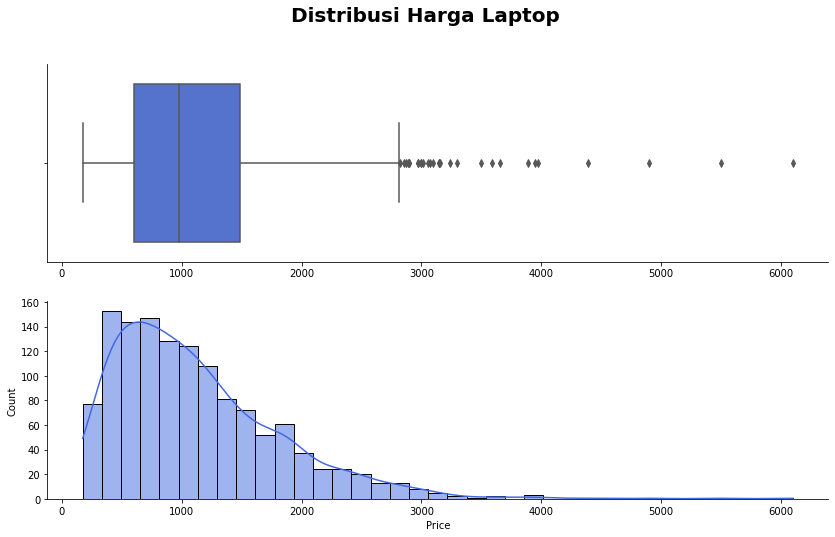

In [43]:
fig = plt.figure(figsize=(14,8))

ax = fig.add_subplot(2,1,1)
sns.boxplot(x='Price',data=df, color='royalblue')
plt.xlabel(None)
ax = fig.add_subplot(2,1,2)
sns.histplot(x='Price', data=df, kde=True, color='royalblue')
plt.suptitle('Distribusi Harga Laptop', size=20)
sns.despine()

In [44]:
df['Price'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Price,1303.0,1123.686992,699.009043,174.0,599.0,977.0,1487.88,6099.0


Interquartil (IQR) distribusi harga laptop berada di angka ~600-1500 €, dengan rata-rata harga laptop ada di angka 1124 €. Harga laptop termahal ada di angka 6099 €. 

Terdapat beberapa laptop yang harganya melebihi batas ekstrim atas grafik boxplot. Hal ini dapat menjadi perhatian saat analisis pada bagian selanjutnya akan adanya potensi outlier laptop mahal pada dataset ini.

## Univariate & Bivariate Analysis

- ###  Company

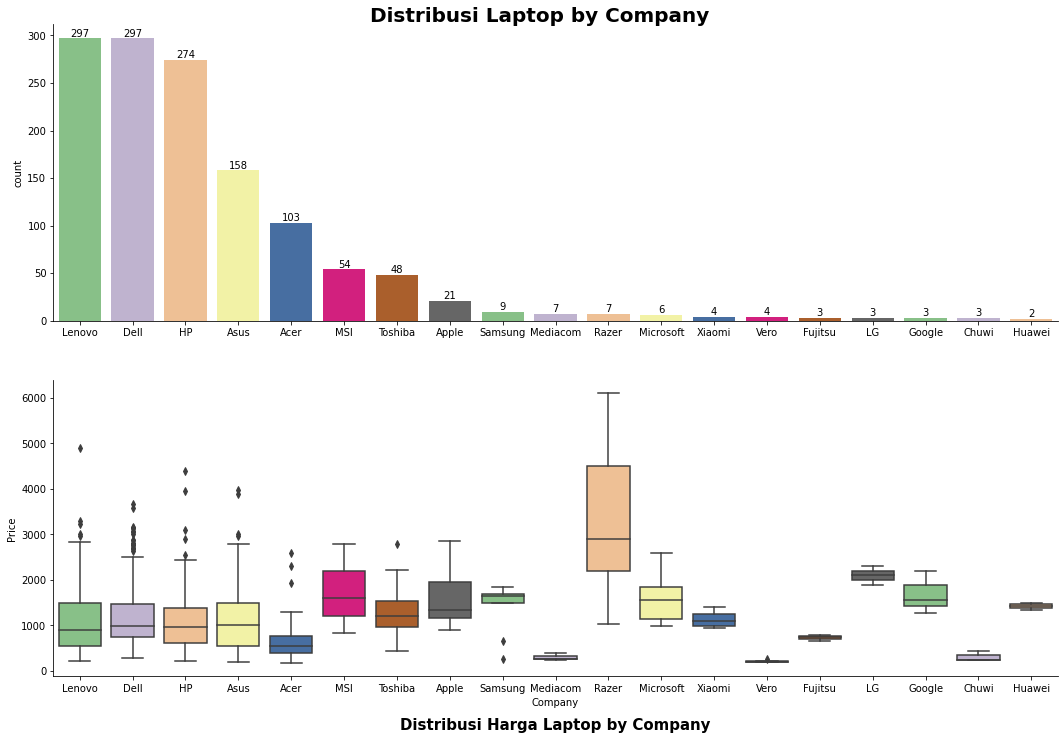

In [45]:
fig = plt.figure(figsize=(18,12))

plt.suptitle('Distribusi Laptop by Company', y=0.9, size=20)
ax = fig.add_subplot(2,1,1)
sns.countplot(x='Company',data=df, order=df['Company'].value_counts().index, palette='Accent')
plt.bar_label(ax.containers[0])
plt.xlabel(None)


ax = fig.add_subplot(2,1,2)
sns.boxplot(x='Company', y='Price', data=df, order=df['Company'].value_counts().index, palette='Accent')
plt.title('Distribusi Harga Laptop by Company', y=-0.2, size=15)

sns.despine()

***Key Points:***
- Dari 19 brand laptop yang ada di dataset, **brand dengan distribusi terbanyak adalah Lenovo, Dell, dan HP**
- Terdapat 11 brand laptop yang penjualannya minim, dibawah 10 unit laptop per company.
- Empat brand laptop yang memiliki penjualan terbanyak memiliki rataan harga yang relatif sama di angka ~1000 €.
- Dari brand-brand laptop dengan penjualan diatas 10 unit, **brand Acer memiliki rataan harga laptop paling murah.**
- **Laptop dengan rataan harga termahal adalah Razer, di angka 3000 €.**
- Ada beberapa brand yang hanya menjual laptop dengan harga murah yaitu Mediacom, Vero, dan Chuwi.

- ### Laptop Type

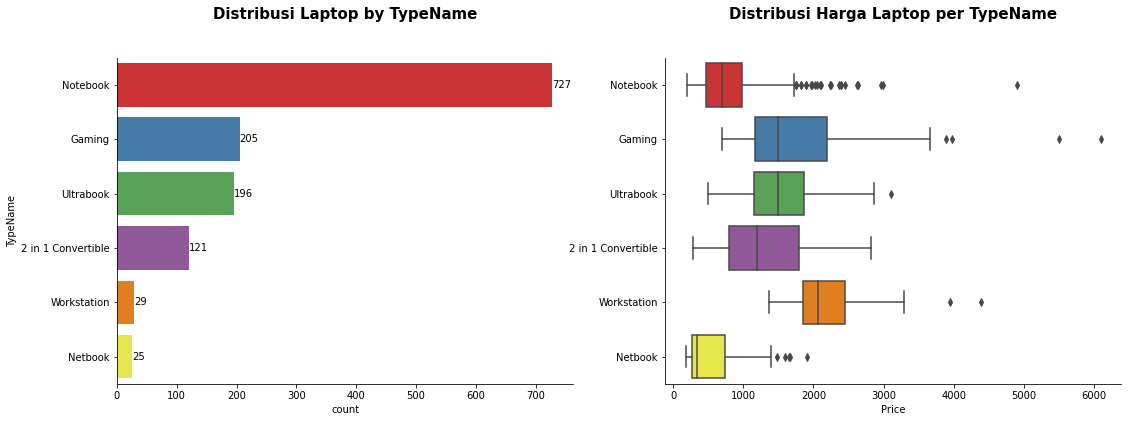

In [46]:
fig = plt.figure(figsize=(18,6))

ax = fig.add_subplot(1,2,1)
sns.countplot(y='TypeName',data=df, order=df['TypeName'].value_counts().index, palette='Set1')
plt.title('Distribusi Laptop by TypeName', y=1.1, size=15)
plt.bar_label(ax.containers[0])

ax = fig.add_subplot(1,2,2)
sns.boxplot(y='TypeName', x='Price', data=df, order=df['TypeName'].value_counts().index, palette='Set1')
plt.title('Distribusi Harga Laptop per TypeName', y=1.1, size=15)
plt.ylabel(None)

sns.despine()

***Key Points:***

- **Lebih dari setengah tipe laptop yang terjual adalah tipe Notebook (55.8%).** 
- Sementara itu, laptop dengan tipe Workstation dan Netbook masih jarang terjual.
- **Salah satu faktor banyaknya penjualan laptop tipe Notebook adalah rataan harganya yang lebih murah dibandingkan tipe laptop lain (kecuali Netbook).** Namun, tetap ada juga laptop high-end dengan harga yang mahal di tipe Notebook ini. Harga tertinggi berada di angka ~5000 €.
- Tipe laptop dengan rataan harga termahal adalah laptop Workstation di angka ~2000 €.
- Dua laptop termahal di dataset ini adalah laptop Gaming, dimana kedua laptop ini memiliki harga diatas 5000 €.
- **Tipe Netbook memiliki rataan dan rentang harga laptop termurah.** 75% dari tipe laptop ini berada di rentang harga ~175-745 €. Meskipun harganya yang murah dibandingkan tipe laptop lain, Netbook masih memiliki total penjualan yang minim.

- ### Display Size

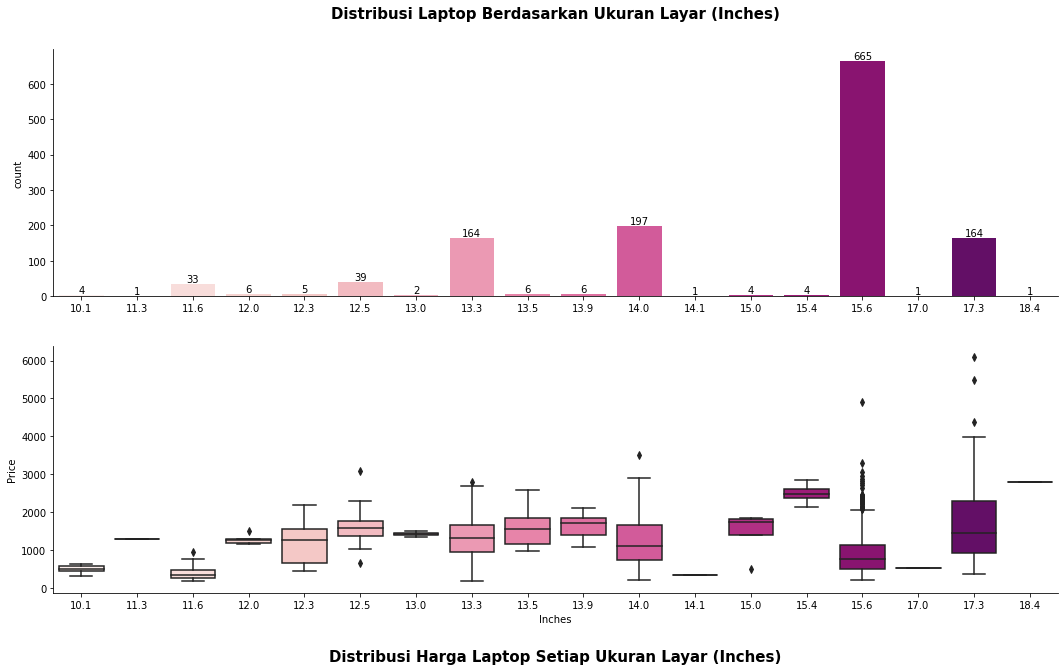

In [47]:
fig = plt.figure(figsize=(18,10))

ax = fig.add_subplot(2,1,1)
sns.countplot(x='Inches',data=df, palette='RdPu')
plt.title('Distribusi Laptop Berdasarkan Ukuran Layar (Inches)', y=1.1, size=15)
plt.bar_label(ax.containers[0])
plt.xlabel(None)

ax = fig.add_subplot(2,1,2)
sns.boxplot(y='Price', x='Inches', data=df, palette='RdPu')
plt.title('Distribusi Harga Laptop Setiap Ukuran Layar (Inches)', y=-0.3, size=15)

sns.despine()

Terdapat enam ukuran layar laptop yang memiliki distribusi di atas 10 unit. Ukuran layar lainnya dapat diasumsikan sebagai layar dengan ukuran khusus atau unik, misalnya hanya ada untuk produk atau brand laptop tertentu saja. Untuk analisis fitur ukuran layar (**`Inches`**), akan digunakan enam grup ukuran layar laptop yang lebih umum atau konvesional. Maka dari itu, laptop-laptop dengan ukuran layar unik ini akan dimasukan ke kelompok ukuran layar yang konvesional.

In [48]:
for i in range(df.shape[0]):
    if df['Inches'][i] <= 11.6:
        df['Inches'][i] = 11.6
    elif df['Inches'][i] <= 12.5:
        df['Inches'][i] = 12.5
    elif df['Inches'][i] <= 13.3:
        df['Inches'][i] = 13.3
    elif df['Inches'][i] <= 14.0:
        df['Inches'][i] = 14.0
    elif df['Inches'][i] <= 15.6:
        df['Inches'][i] = 15.6
    else:
        df['Inches'][i] = 17.3

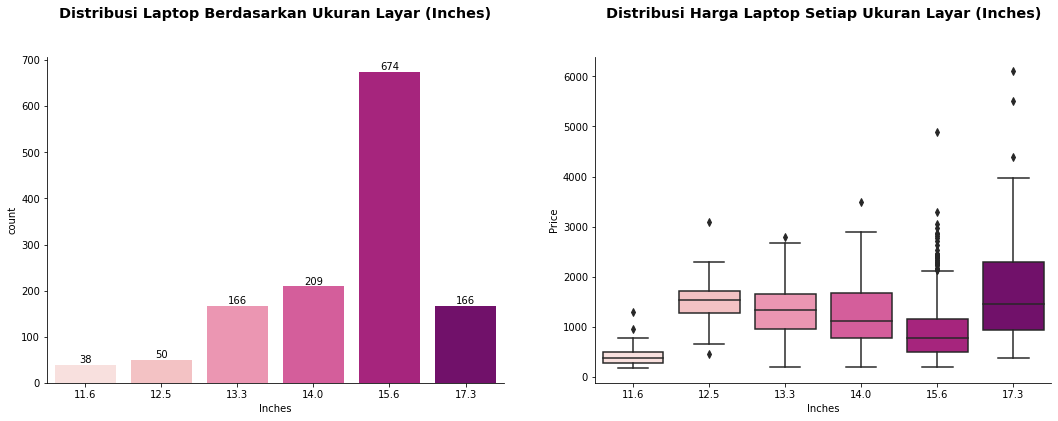

In [49]:
fig = plt.figure(figsize=(18,6))

ax = fig.add_subplot(1,2,1)
sns.countplot(x='Inches',data=df, palette='RdPu')
plt.title('Distribusi Laptop Berdasarkan Ukuran Layar (Inches)', y=1.1)
plt.bar_label(ax.containers[0])

ax = fig.add_subplot(1,2,2)
sns.boxplot(x='Inches', y='Price', data=df, palette='RdPu')
plt.title('Distribusi Harga Laptop Setiap Ukuran Layar (Inches)', y=1.1)

sns.despine()

***Key Points:***

- **Ukuran layar laptop yang paling umum adalah 15.6"** (51.65% dari total laptop di dataset)
- Ukuran layar terkecil (11.6") memiliki rataan dan rentang harga laptop termurah, sementara ukuran layar terbesar (17.3") memiliki rataan dan rentang harga termahal.
- **Dari grafik boxplot dapat dilihat bahwa tidak ada korelasi yang signifikan terlihat dari ukuran layar terhadap harga laptop.**
- Diketahui sebelumnya dua laptop yang berharga diatas 5000 € adalah laptop Gaming. Selain memiliki tipe yang sama, dua laptop termahal ini juga memiliki ukuran layar yang sama yaitu 17.3".

- ### RAM

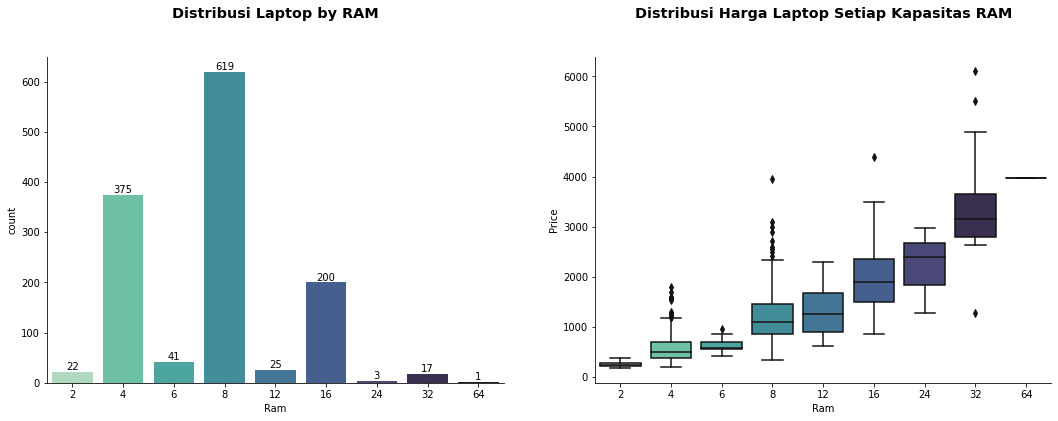

In [50]:
fig = plt.figure(figsize=(18,6))

ax = fig.add_subplot(1,2,1)
sns.countplot(x='Ram',data=df, palette='mako_r')
plt.title('Distribusi Laptop by RAM', y=1.1)
plt.bar_label(ax.containers[0])

ax = fig.add_subplot(1,2,2)
sns.boxplot(y='Price', x='Ram', data=df, palette='mako_r')
plt.title('Distribusi Harga Laptop Setiap Kapasitas RAM', y=1.1)

sns.despine()

***Key Points:***

- **Mayoritas laptop-laptop di dataset ini menggunakan RAM 4, 8, dan 16 GB**
- **Terdapat korelasi positif yang terlihat antara kapasitas RAM dan harga laptop, dimana semakin besar kapasitas RAM yang digunakan maka semakin mahal harga laptop tersebut.**
- Dua laptop yang memiliki harga diatas 5000 Euro menggunakan RAM dengan kapasitas 32 GB
- Terdapat laptop dengan kapasitas RAM 32 GB yang memiliki harga yang relatif jauh lebih murah dibandingkan laptop-laptop RAM 32 GB lainnya. Laptop ini memiliki harga sebesar 1279 €. Laptop ini akan diamati lebih lanjut karena adanya potensi outlier.

- ### Operation System

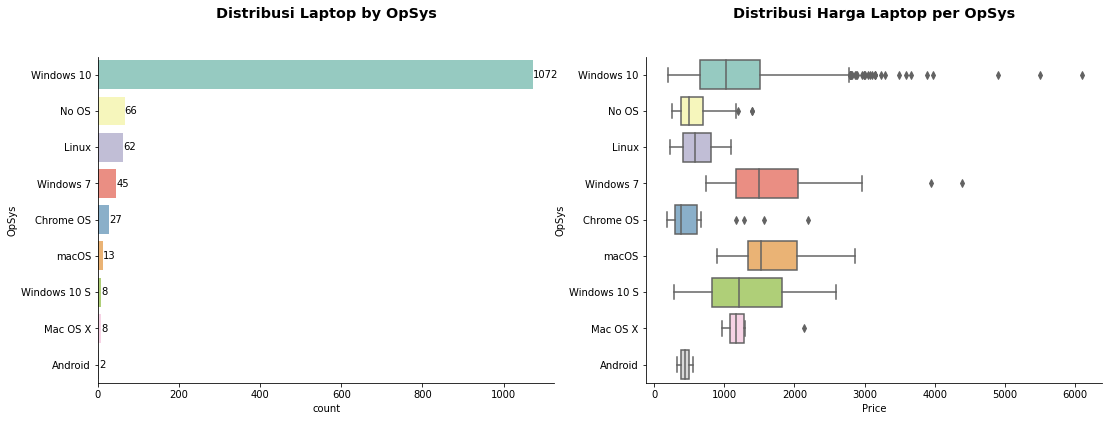

In [51]:
fig = plt.figure(figsize=(18,6))

ax = fig.add_subplot(1,2,1)
sns.countplot(y='OpSys',data=df, palette='Set3', order=df['OpSys'].value_counts().index)
plt.title('Distribusi Laptop by OpSys', y=1.1)
plt.bar_label(ax.containers[0])

ax = fig.add_subplot(1,2,2)
sns.boxplot(x='Price', y='OpSys', data=df, palette='Set3', order=df['OpSys'].value_counts().index)
plt.title('Distribusi Harga Laptop per OpSys', y=1.1)

sns.despine()

***Key Points:***

- **Mayoritas laptop pada dataset menggunakan Windows 10 sebagai Operation System (82.27%).** Rataan harga berada di angka ~1000 €.
- Untuk laptop yang menggunakan OpSys selain Windows 10, terdapat empat OpSys yang memiliki rataan harga lebih rendah yaitu Linux, Chrome OS, Android dan laptop tanpa OS.
- Sementara itu, ada dua OpSys yang memiliki rataan harga lebih tinggi dibandingkan Windows 10 & 10S yaitu Windows 7 dan macOS.

- ### Screen Resolution

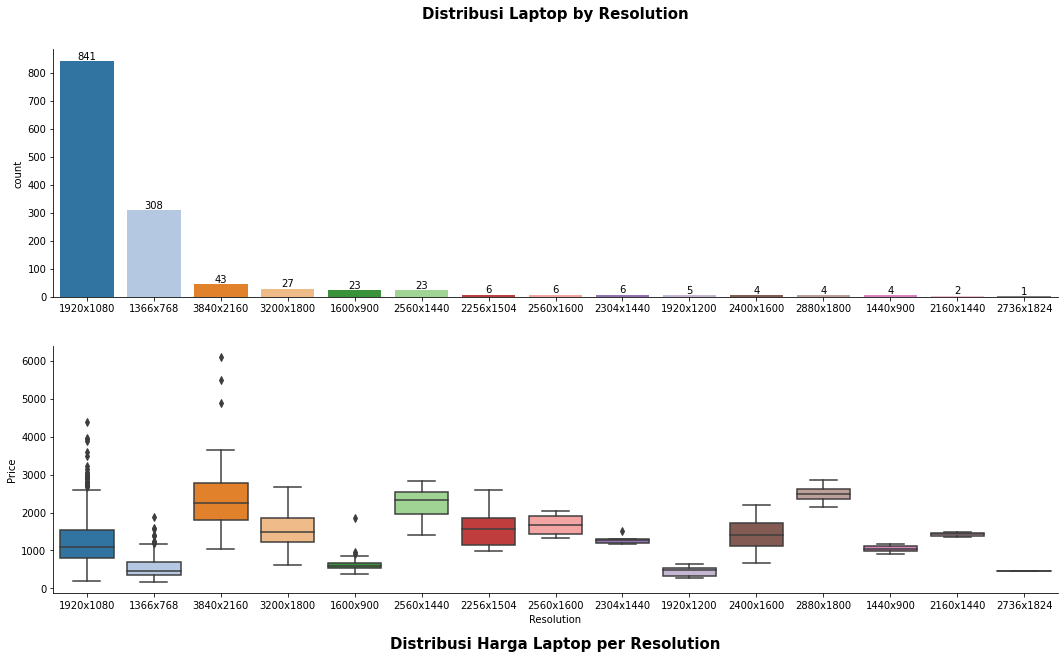

In [52]:
fig = plt.figure(figsize=(18,10))

ax = fig.add_subplot(2,1,1)
sns.countplot(x='Resolution',data=df, palette='tab20', order=df['Resolution'].value_counts().index)
plt.title('Distribusi Laptop by Resolution', y=1.1, size=15)
plt.bar_label(ax.containers[0])
plt.xlabel(None)

ax = fig.add_subplot(2,1,2)
sns.boxplot(y='Price', x='Resolution', data=df, palette='tab20', order=df['Resolution'].value_counts().index)
plt.title('Distribusi Harga Laptop per Resolution', y=-0.25, size=15)

sns.despine()

Sebelum melanjutkan analisis pada fitur ini, beberapa resolusi layar yang jarang digunakan pada laptop akan dimasukan ke dalam kelompok resolusi yang lebih standar. Dari semua resolusi yang ada, akan digunakan enam kelompok resolusi sebagai resolusi standar yaitu 1366x768, 1600x900, 1920x1080, 2560x1440, 3200x1800, dan 3840x2160.

In [53]:
for i in range(df.shape[0]):
    if df['Resolution'][i] in ['1366x768', '1440x900']:
        df['Resolution'][i] = '1366x768'
    elif df['Resolution'][i] in ['1600x900']:
        df['Resolution'][i] = '1600x900'
    elif df['Resolution'][i] in ['1920x1080', '1920x1200', '2160x1440', '2256x1504', '2304x1440']:
        df['Resolution'][i] = '1920x1080'
    elif df['Resolution'][i] in ['2560x1440', '2560x1600', '2880x1800', '2736x1824']:
        df['Resolution'][i] = '2560x1440'
    elif df['Resolution'][i] in ['3200x1800', '2400x1600']:
        df['Resolution'][i] = '3200x1800'
    else:
        df['Resolution'][i] = '3840x2160'

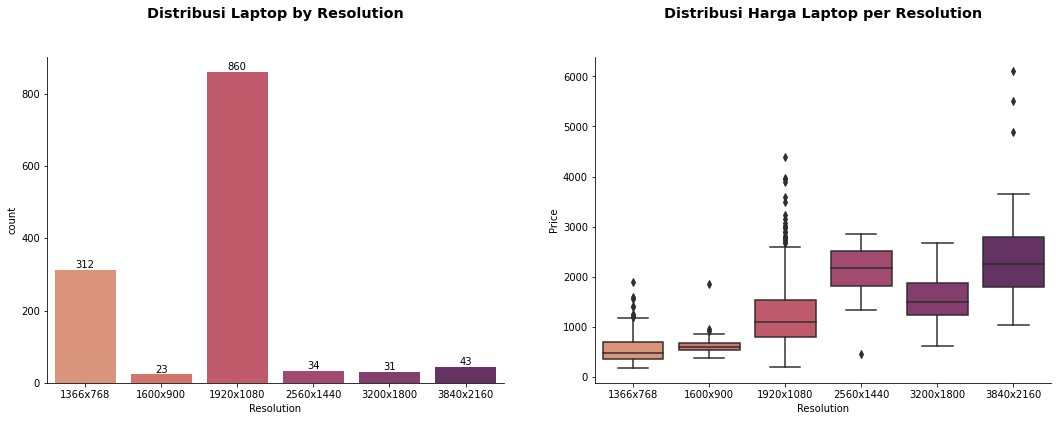

In [54]:
fig = plt.figure(figsize=(18,6))

ax = fig.add_subplot(1,2,1)
sns.countplot(x='Resolution',data=df, palette='flare', order=['1366x768', '1600x900', '1920x1080', '2560x1440', '3200x1800', '3840x2160'])
plt.title('Distribusi Laptop by Resolution', y=1.1)
plt.bar_label(ax.containers[0])

ax = fig.add_subplot(1,2,2)
sns.boxplot(y='Price', x='Resolution', data=df, palette='flare', order=['1366x768', '1600x900', '1920x1080', '2560x1440', '3200x1800', '3840x2160'])
plt.title('Distribusi Harga Laptop per Resolution', y=1.1)

sns.despine()

***Key Points:***
- **Mayoritas resolusi layar yang digunakan pada laptop di dataset adalah 1920x1080 (66%) dan 1366x768 (24%)**
- **Terlihat korelasi positif antara resolusi dan harga laptop**, dimana semakin besar resolusi layar maka rataan dari harga laptop cenderung lebih mahal. Namun, terdapat pengecualian pada resolusi 2560x1440 karena rataan harga resolusi ini justru lebih mahal dibandingkan resolusi 3200x1800.
- Tiga laptop termahal sama-sama menggunakan resolusi tertinggi di dataset yaitu 3840x2160 (4K Ultra HD)

- ### IPS Feature

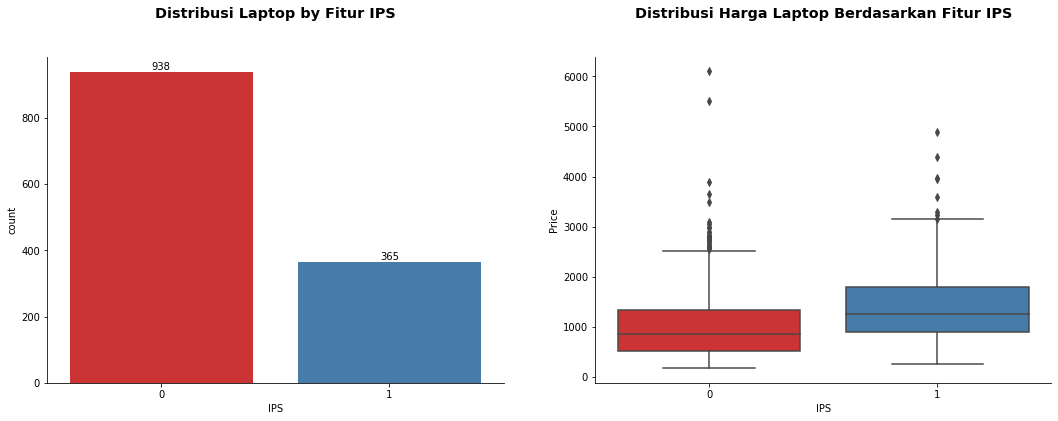

In [55]:
fig = plt.figure(figsize=(18,6))

ax = fig.add_subplot(1,2,1)
sns.countplot(x='IPS',data=df, palette='Set1', order=df['IPS'].value_counts().index)
plt.title('Distribusi Laptop by Fitur IPS', y=1.1)
plt.bar_label(ax.containers[0])

ax = fig.add_subplot(1,2,2)
sns.boxplot(y='Price', x='IPS', data=df, palette='Set1', order=df['IPS'].value_counts().index)
plt.title('Distribusi Harga Laptop Berdasarkan Fitur IPS', y=1.1)

sns.despine()

***Key Points:***
- Persentase jumlah laptop yang menggunakan fitur IPS Panel ada sebanyak 28%
- **Laptop yang menggunakan fitur IPS Panel pada layarnya memiliki rataan harga yang lebih mahal dibandingkan yang tidak menggunakan IPS Panel.**
- Dua laptop termahal tidak menggunakan fitur IPS pada layarnya.
- Terdapat laptop-laptop dengan harga diatas 3000 € yang tidak memiliki fitur IPS. Maka dari itu, dapat dikatakan bahwa fitur IPS ini bukanlah suatu fitur premium yang dapat membedakan kelompok laptop high-end dan low-end.

- ### Touchscreen Feature

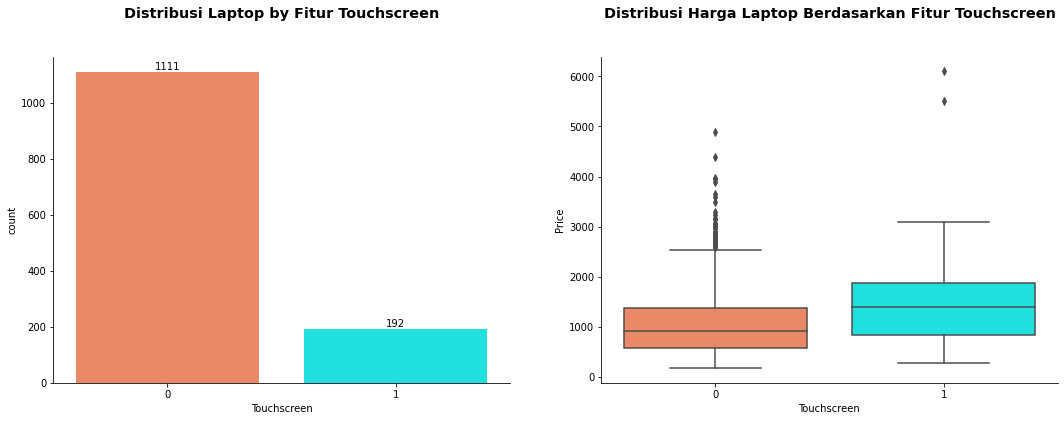

In [56]:
fig = plt.figure(figsize=(18,6))

ax = fig.add_subplot(1,2,1)
sns.countplot(x='Touchscreen',data=df, palette=['coral', 'cyan'], order=df['Touchscreen'].value_counts().index)
plt.title('Distribusi Laptop by Fitur Touchscreen', y=1.1)
plt.bar_label(ax.containers[0])

ax = fig.add_subplot(1,2,2)
sns.boxplot(y='Price', x='Touchscreen', data=df, palette=['coral', 'cyan'], order=df['Touchscreen'].value_counts().index)
plt.title('Distribusi Harga Laptop Berdasarkan Fitur Touchscreen', y=1.1)

sns.despine()

***Key Points:***
- Persentase laptop yang menggunakan fitur *touchscreen* hanya 14.74% saja
- Laptop yang menggunakan fitur *touchscreen* memiliki rataan harga yang lebih mahal dibandingkan yang tidak memakainya
- Terdapat hal menarik dimana laptop-laptop dengan harga diatas 3000 € justru tidak menggunaan fitur ini, kecuali dua laptop termahal yang ada di dataset ini 

- ### CPU Brand

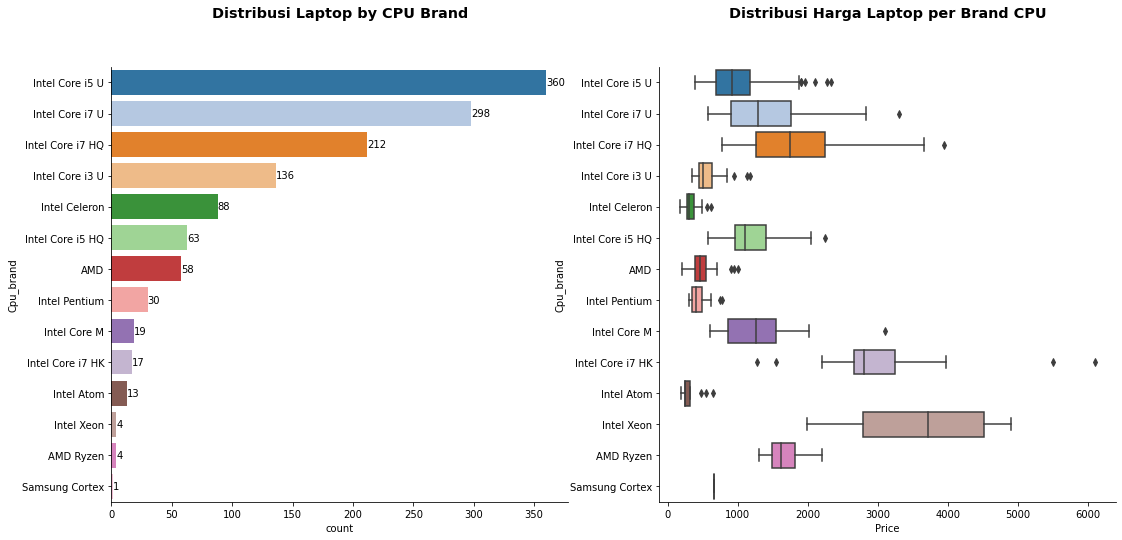

In [57]:
fig = plt.figure(figsize=(18,8))

ax = fig.add_subplot(1,2,1)
sns.countplot(y='Cpu_brand',data=df, palette='tab20', order=df['Cpu_brand'].value_counts().index)
plt.title('Distribusi Laptop by CPU Brand', y=1.1)
plt.bar_label(ax.containers[0])

ax = fig.add_subplot(1,2,2)
sns.boxplot(x='Price', y='Cpu_brand', data=df, palette='tab20', order=df['Cpu_brand'].value_counts().index)
plt.title('Distribusi Harga Laptop per Brand CPU', y=1.1)

sns.despine()

<blockquote> Sebelum menganalisa fitur Cpu_brand, perlu diketahui beberapa indikator dan penulisan CPU Brand untuk memudahkan dan memperjelas analisis yang akan dilakukan. Pada dataset ini terdapat tiga brand utama yaitu Intel, AMD, dan Samsung. Di setiap brand tersebut ada sub-brand nya masing-masing. Brand Intel memiliki sub-brand seperti Core, Celeron, Pentium, Atom, dan Xeon. AMD hanya terdiri dari sub-brand Ryzen dan non-Ryzen. 
<br>
    
Pada sub-brand Intel Core terdapat brand modifier yang membedakan setiap produk yaitu i3, i5, i7 dan M. Pada setiap brand modifier juga terdapat indikator yang membedakan kegunaan atau fungsionalitas dari CPU tersebut. Beberapa indikator Intel Core yang ada pada dataset ini adalah U (*mobile power efficient*), HQ (*high performance optimized for mobile, quad core*), dan HK (*high performance optimized for mobile, unlocked*). </blockquote>

***Key Points:***
- **Komposisi persentase brand CPU pada dataset ini adalah Intel (95.16%), AMD (4.76%), Samsung (0.08%)**
- Sub-brand yang paling banyak digunakan adalah Intel Core series, terutama untuk Intel Core dengan indikator U (mobile power efficient)
- **Untuk Intel Core series, brand modifier i7 menjadi CPU Brand yang paling banyak digunakan**
- Brand CPU yang memiliki rataan harga laptop tertinggi adalah Intel Xeon dan Intel Core i7 HK. Akan tetapi, total unit untuk kedua brand ini berada di bawah 20 unit sehingga ada potensi bias pada rataan harga kedua brand ini
- Sub-brand Intel Celeron, Pentium dan Atom memiliki rataan harga yang relatif paling murah dibandingkan brand lain
- **Untuk Intel Core series pada brand modifier yang sama, urutan indikator U-HQ-HK adalah urutan indikator dengan rataan harga laptop termurah sampai yang termahal**
- **Pada brand AMD, sub-brand AMD Ryzen memiliki rataan harga yang lebih mahal dibandingkan AMD non-Ryzen**
- Sementara itu, hanya ada satu laptop yang menggunakan brand Samsung. Hal ini dapat dianalisa dan dipertimbangkan saat pemodelan karena adanya potensi outlier

- ### CPU Speed

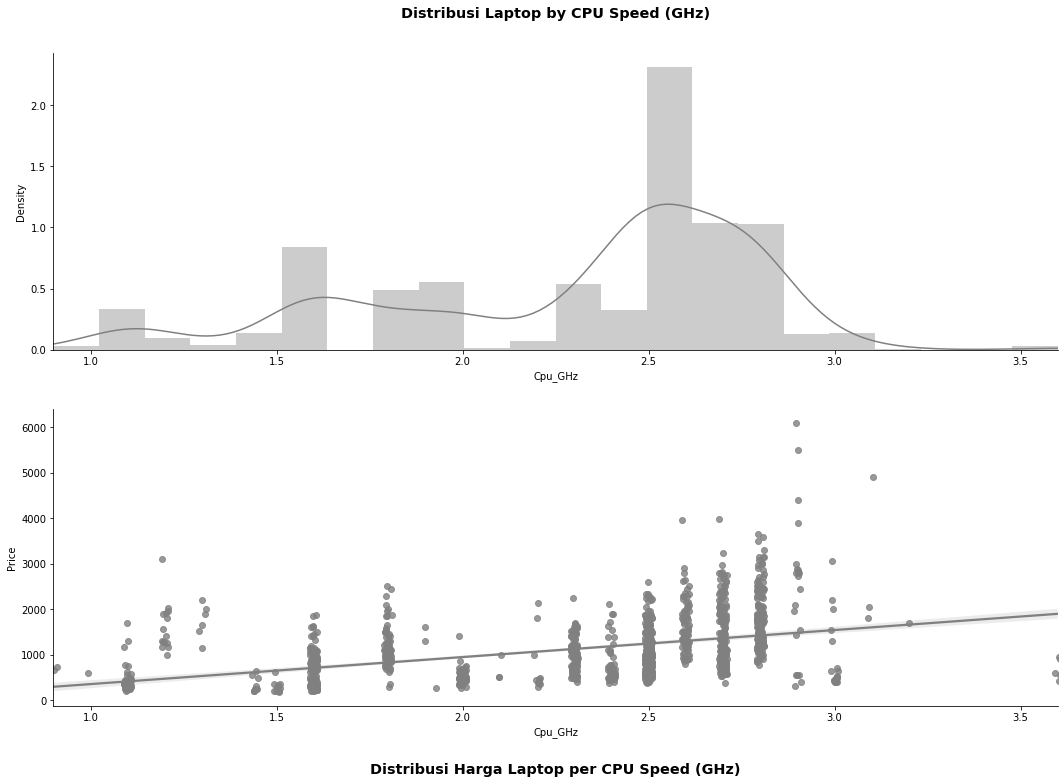

In [60]:
fig = plt.figure(figsize=(18,12))

ax = fig.add_subplot(2,1,1)
sns.distplot(df['Cpu_GHz'], color='Gray')
plt.xlim(df['Cpu_GHz'].min(), df['Cpu_GHz'].max())
plt.title('Distribusi Laptop by CPU Speed (GHz)', y=1.1)

ax = fig.add_subplot(2,1,2)
sns.regplot(y='Price', x='Cpu_GHz', data=df, color='Gray', x_jitter=.01)
plt.xlim(df['Cpu_GHz'].min(), df['Cpu_GHz'].max())
plt.title('Distribusi Harga Laptop per CPU Speed (GHz)', y=-0.25)

sns.despine()

***Key Points:***
- **Kecepatan CPU yang paling sering digunakan pada laptop di dataset berada di rentang 2.3-2.8 GHz, dimana kecepatan CPU yang paling banyak digunakan ada di angka 2.5 GHz**
- **Plot regresi menunjukan adanya korelasi positif antara kecepatan CPU dan harga laptop.** Namun, terdapat poin-poin yang dapat diamati terkait plot regresi ini. Plot regresi menunjukan bahwa semakin tinggi kecepatan CPU maka semakin mahal harga laptop tersebut. Akan tetapi lima laptop yang memiliki kecepatan CPU paling tinggi (3.6 GHz) justru memiliki harga yang relatif murah (kurang dari 1000 €). Bahkan terdapat cukup banyak laptop dengan kecepatan CPU dibawah 2 GHz yang memiliki harga yang lebih mahal dibandingkan kelima laptop tersebut.

Untuk memperjelas analisa terkait variabel kecepatan CPU ini, akan divisualisasikan distribusi harga laptop per kecepatan CPU untuk setiap brand CPU yang ada.

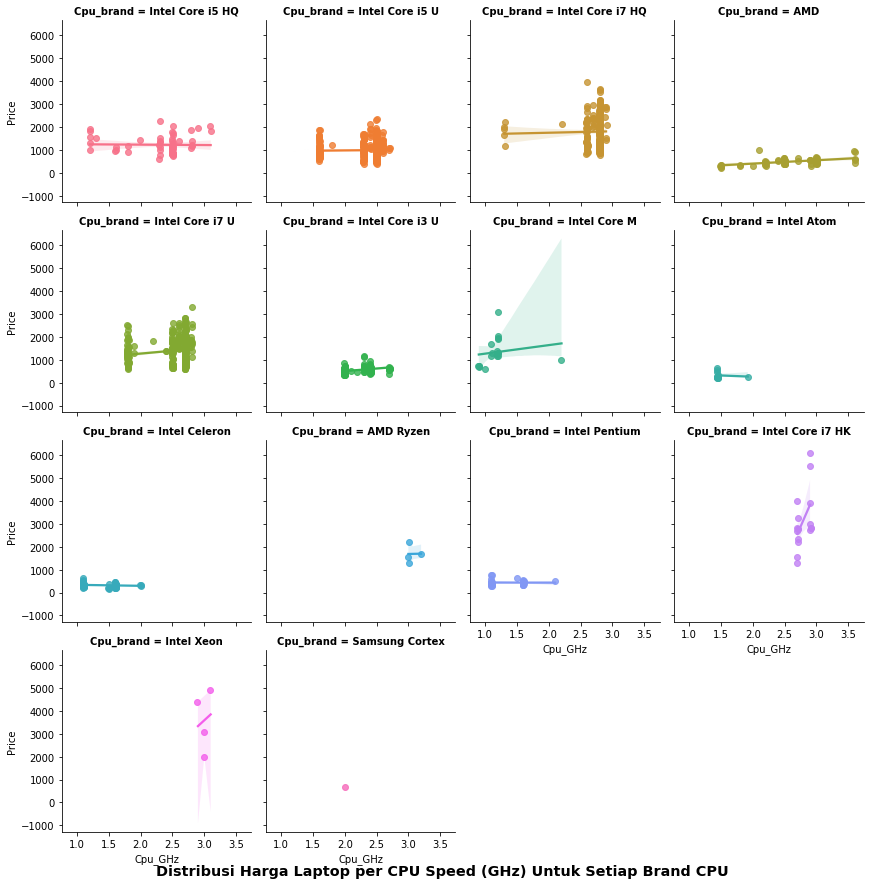

In [61]:
sns.lmplot(x="Cpu_GHz", y="Price", hue="Cpu_brand", col="Cpu_brand", data=df, height=3, aspect=1, x_jitter=.01, col_wrap=4)
plt.suptitle('Distribusi Harga Laptop per CPU Speed (GHz) Untuk Setiap Brand CPU', y=-0.005)

sns.despine()

Dapat dilihat hampir di semua Brand CPU bahwa kecepatan CPU tidak mempengaruhi harga dari laptop tersebut. Dari 14 brand CPU, korelasi positif hanya terlihat jelas pada 4 brand yaitu Intel Core M, Intel Core i7 HK, Intel Core i7 U, Intel Xeon. Maka dari itu, dapat dikatakan bahwa Brand CPU memiliki pengaruh yang lebih signifikan terhadap harga sebuah laptop dibandingkan kecepatan CPU.

In [62]:
df[df['Cpu_GHz']==3].loc[:, ['Cpu_brand', 'Cpu_GHz', 'Price']].sort_values('Price')

,Cpu_brand,Cpu_GHz,Price
84,AMD,3.0,395.00
5,AMD,3.0,400.00
160,AMD,3.0,403.00
1031,AMD,3.0,409.00
371,AMD,3.0,426.00
124,AMD,3.0,451.00
252,AMD,3.0,469.00
375,AMD,3.0,488.99
729,AMD,3.0,489.00
395,AMD,3.0,499.00


Dataframe diatas berisi laptop-laptop dengan kecepatan CPU 3 GHz. Dapat dilihat bahwa meskipun kecepatan CPU sama, namun terdapat perbedaan harga laptop yang cukup signifikan. Untuk laptop dengan CPU AMD, harga laptop berada di kisaran 400-700 €. Sementara itu, untuk laptop dengan CPU AMD Ryzen dan Intel Xeon berada di kisaran 1300-3000 €. Hal ini mendukung analisa sebelumnya yang menyatakan bahwa Brand CPU lebih berpengaruh pada harga laptop dibandingkan kecepatan CPU.

- ### GPU Brand

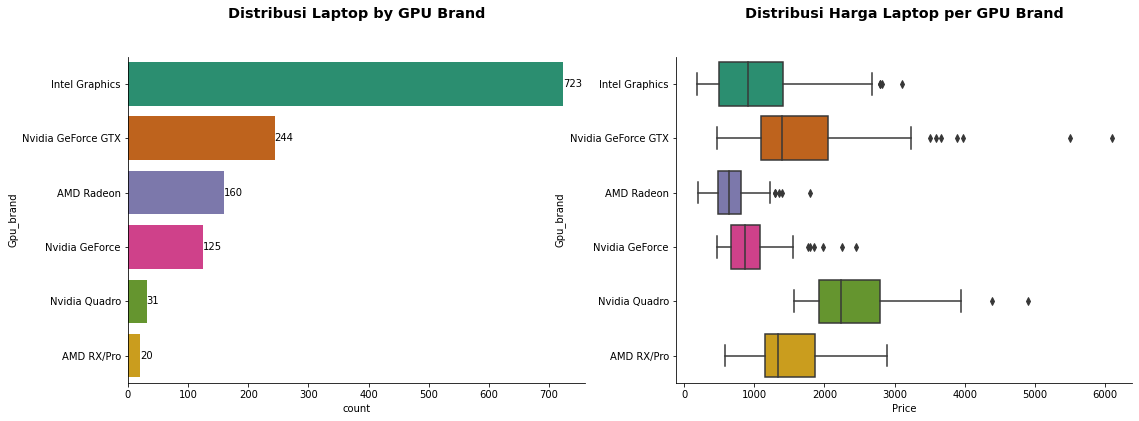

In [64]:
fig = plt.figure(figsize=(18,6))

ax = fig.add_subplot(1,2,1)
sns.countplot(y='Gpu_brand',data=df, palette='Dark2', order=df['Gpu_brand'].value_counts().index)
plt.title('Distribusi Laptop by GPU Brand', y=1.1)
plt.bar_label(ax.containers[0])

ax = fig.add_subplot(1,2,2)
sns.boxplot(x='Price', y='Gpu_brand', data=df, palette='Dark2', order=df['Gpu_brand'].value_counts().index)
plt.title('Distribusi Harga Laptop per GPU Brand', y=1.1)

sns.despine()

***Key Points:***
- **Brand GPU yang paling banyak digunakan adalah Intel Graphics (55.49%)**
- Brand GPU yang memiliki rataan dan kisaran harga laptop yang paling mahal adalah Nvidia Quadro
- Selain Nvidia Quadro, brand Nvidia GeForce GTX dan AMD RX/Pro juga memiliki rataan harga yang lebih tinggi dibandingkan Intel Graphics
- **Brand GPU yang memiliki rataan dan kisaran harga laptop yang paling murah adalah AMD Radeon**
- Dua laptop termahal yang ada di dataset ini sama-sama menggunakan brand GPU Nvidia GeForce GTX

- ### Memory

1. #### Memory Type

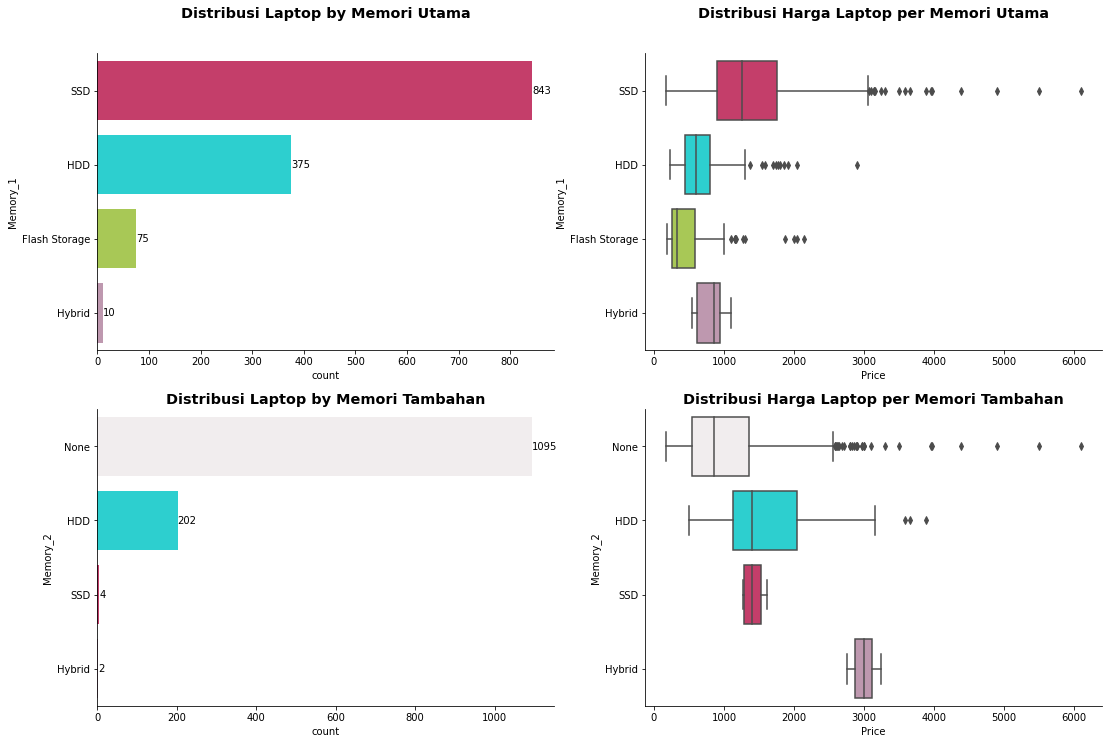

In [65]:
fig = plt.figure(figsize=(18,12))

memory_palette = {'SSD': "#DB2763", 'HDD':  "#12EAEA", 'Flash Storage': "#B0DB43", 'Hybrid': "#C492B1", 'None': '#F1EDEE'}

ax = fig.add_subplot(2,2,1)
sns.countplot(y='Memory_1',data=df, palette=memory_palette, order=df['Memory_1'].value_counts().index)
plt.title('Distribusi Laptop by Memori Utama', y=1.1)
plt.bar_label(ax.containers[0])

ax = fig.add_subplot(2,2,2)
sns.boxplot(x='Price', y='Memory_1', palette=memory_palette, data=df, order=df['Memory_1'].value_counts().index)
plt.title('Distribusi Harga Laptop per Memori Utama', y=1.1)

ax = fig.add_subplot(2,2,3)
sns.countplot(y='Memory_2',data=df, palette=memory_palette, order=df['Memory_2'].value_counts().index)
plt.title('Distribusi Laptop by Memori Tambahan', y=1)
plt.bar_label(ax.containers[0])

ax = fig.add_subplot(2,2,4)
sns.boxplot(x='Price', y='Memory_2', data=df, palette=memory_palette, order=df['Memory_2'].value_counts().index)
plt.title('Distribusi Harga Laptop per Memori Tambahan', y=1)


sns.despine()

***Key Points:***
- **Memori utama yang paling banyak digunakan pada laptop adalah memori SSD (64.70%)**
- **Memori SSD sebagai memori utama memiliki rataan harga yang lebih mahal dibandingkan tipe memori utama lainnya**. Bahkan, semua laptop yang harganya diatas 3000 € menggunakan memori SSD.
- Sementara itu, tipe memori dengan rataan harga paling murah adalah memori Flash Storage.


- Terkait memori tambahan, hanya 15.96% dari semua laptop yang memberikan memori tambahan.
- Hampir semua memori tambahan yang diberikan adalah memori tipe HDD.

2. #### Primary Memory Size

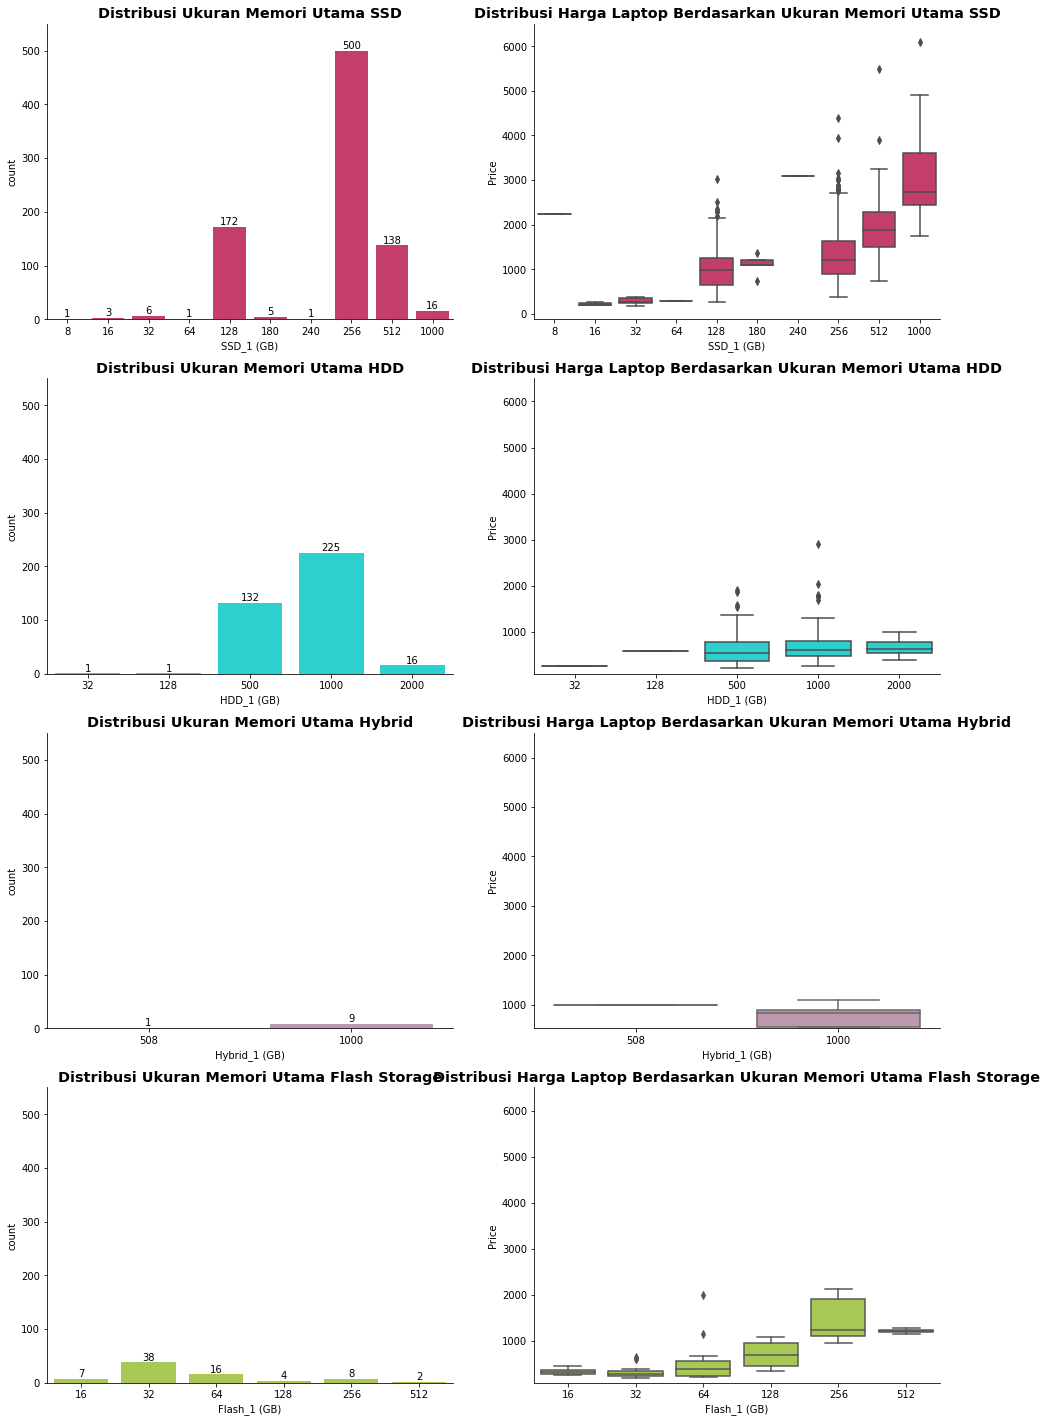

In [66]:
memories = ['SSD', 'HDD', 'Hybrid', 'Flash Storage']
col = ['SSD_1 (GB)', 'HDD_1 (GB)', 'Hybrid_1 (GB)', 'Flash_1 (GB)']

fig = plt.figure(figsize=(16,25))

for i in range(1, len(memories)+1):
    ax = fig.add_subplot(4,2,i*2-1)
    sns.countplot(x=col[i-1], data=df[df[col[i-1]] > 0], color=memory_palette[memories[i-1]])
    plt.bar_label(ax.containers[0])
    plt.ylim(None, 550)
    plt.title(f'Distribusi Ukuran Memori Utama {memories[i-1]}')

    ax = fig.add_subplot(4,2,i*2)
    sns.boxplot(y='Price', x=col[i-1], data=df[df[col[i-1]] > 0], color=memory_palette[memories[i-1]])
    plt.ylim(None, 6500)
    plt.title(f'Distribusi Harga Laptop Berdasarkan Ukuran Memori Utama {memories[i-1]}')

sns.despine()

***Key Points:***
1. SSD
    - **Ukuran memori SSD yang paling banyak digunakan adalah SSD 256 GB**
    - **Terdapat korelasi positif pada memori SSD, dimana semakin besar ukuran memori yang digunakan maka akan semakin mahal juga harga laptop tersebut**
    - Terdapat potensi outlier, dimana laptop dengan memori SSD 8 GB memiliki harga yang relatif mahal diatas 2000 €
2. HDD
    - Range ukuran Memori HDD relatif jauh lebih besar dibandingkan tipe memori lainnya (500-2000 GB)
    - Pada tipe memori ini, terlihat tidak ada pengaruh signifikan antara ukuran memori terhadap harga laptop
3. Hybrid
    - Memori tipe ini jarang digunakan sebagai memori utama laptop. Selain itu, terlihat juga tidak ada pengaruh antara ukuran tipe memori ini terhadap harga laptop
4. Flash Storage
    - Ukuran memori tipe Flash Storage relatif lebih kecil dibandingkan memori lainnya, dimana ukuran memori yang paling banyak digunakan adalah 32-64 GB
    - Pada memori tipe ini, terdapat juga korelasi positif terhadap harga laptop, dimana semakin besar ukuran memori maka semakin mahal harga laptop


Untuk tipe memori SSD, ukuran memori akan dikelompokan ke ukuran yang standar digunakan di pasaran yaitu 128, 256, 512, & 1000 GB.

In [69]:
for i in range(df.shape[0]):
    if df['SSD_1 (GB)'][i] == 0:
        df['SSD_1 (GB)'][i] = 0
    elif df['SSD_1 (GB)'][i] <= 128:
        df['SSD_1 (GB)'][i] = 128
    elif df['SSD_1 (GB)'][i] <= 256:
        df['SSD_1 (GB)'][i] = 256
    elif df['SSD_1 (GB)'][i] <= 512:
        df['SSD_1 (GB)'][i] = 512
    else:
        df['SSD_1 (GB)'][i] = df['SSD_1 (GB)'][i]

- ### Weight

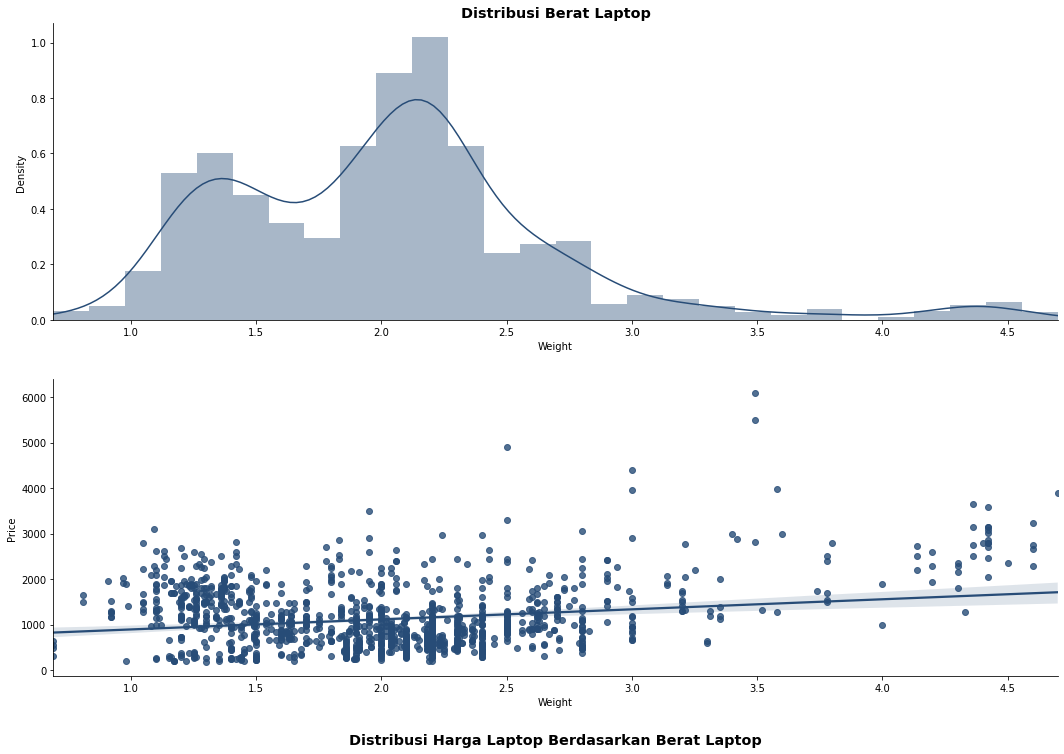

In [67]:
fig = plt.figure(figsize=(18,12))

ax = fig.add_subplot(2,1,1)
sns.distplot(df['Weight'], color='#274C77')
plt.xlim(df['Weight'].min(), df['Weight'].max())
plt.title('Distribusi Berat Laptop', y=1)

ax = fig.add_subplot(2,1,2)
sns.regplot(y='Price', x='Weight', data=df, color='#274C77')
plt.xlim(df['Weight'].min(), df['Weight'].max())
plt.title('Distribusi Harga Laptop Berdasarkan Berat Laptop', y=-.25)

sns.despine()

***Key Points:***
- Laptop-laptop pada dataset ini paling banyak memiliki berat pada rentang ~1.8-2.3 kg.
- **Dari plot regresi dapat dilihat bahwa ada korelasi positif yang tidak terlalu signifikan antara berat laptop dengan harga laptop** 
- Dapat dilihat juga bahwa untuk laptop-laptop yang beratnya diatas 3.5 kg mayoritas memiliki harga diatas 1000 €.

## Handling Outlier

Sebelum melakukan pemodelan, akan dilakukan pengamatan terhadap beberapa laptop yang fitur maupun harganya terlihat ganjil pada analisa sebelumnya. Laptop-laptop ini dapat berperan sebagai outlier pada dataset dan dapat dipertimbangkan untuk dibuang dari dataset.

- ### Laptop Price

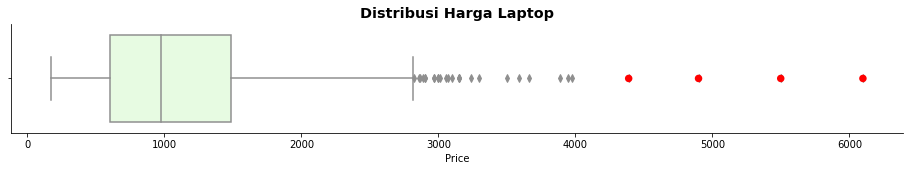

In [70]:
plt.figure(figsize=(16,2))
sns.boxplot(x='Price', data=df, color='#E5FFDE')
sns.stripplot(x='Price', data=df[df['Price'] > 4000], color='Red', jitter=0, size=7.5)
plt.title('Distribusi Harga Laptop')
sns.despine()

Terdapat empat laptop yang memiliki harga yang jauh lebih mahal dari laptop-laptop lainnya. Empat laptop ini sama-sama memiliki harga diatas 4000 €.

In [71]:
df[df['Price'] > 4000]

,Company,TypeName,Inches,Ram,OpSys,Weight,Resolution,IPS,Touchscreen,Cpu_GHz,Cpu_brand,Memory_1,SSD_1 (GB),HDD_1 (GB),Hybrid_1 (GB),Flash_1 (GB),Memory_2,Memory_2 (GB),Total_Memory (GB),Gpu_brand,Price
196,Razer,Gaming,17.3,32,Windows 10,3.49,3840x2160,0,1,2.9,Intel Core i7 HK,SSD,1000,0,0,0,None,0,1000,Nvidia GeForce GTX,6099.0
610,Lenovo,Notebook,15.6,32,Windows 10,2.50,3840x2160,1,0,3.1,Intel Xeon,SSD,1000,0,0,0,None,0,1000,Nvidia Quadro,4899.0
749,HP,Workstation,17.3,16,Windows 7,3.00,1920x1080,1,0,2.9,Intel Xeon,SSD,256,0,0,0,None,0,256,Nvidia Quadro,4389.0
830,Razer,Gaming,17.3,32,Windows 10,3.49,3840x2160,0,1,2.9,Intel Core i7 HK,SSD,512,0,0,0,None,0,512,Nvidia GeForce GTX,5499.0


Dari empat laptop ini, setiap fitur laptop yang digunakan adalah fitur-fitur yang premium sehingga masih wajar harga empat laptop ini relatif lebih mahal dibandingkan laptop-laptop lain. RAM, brand CPU, brand GPU, tipe memori utama yang digunakan dari empat laptop ini memiliki rataan harga yang lebih mahal seperti yang diketahui dari analisa sebelumnya. Dikarenakan tidak adanya kontradiksi antara fitur yang digunakan terhadap harga keempat laptop ini, maka empat laptop ini tidak akan dibuang dari dataset.

In [72]:
df.drop(df[df['Price'] > 4000].index, inplace=True)

- ### RAM 32 GB

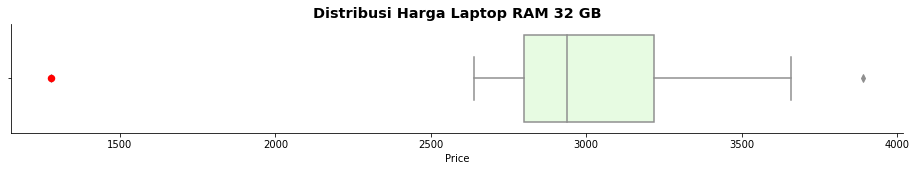

In [73]:
plt.figure(figsize=(16,2))
sns.boxplot(x='Price', data=df[df['Ram'] == 32], color='#E5FFDE')
sns.stripplot(x='Price', data=df[(df['Ram'] == 32) & (df['Price'] < 2000)], color='Red', jitter=0, size=7.5)
plt.title('Distribusi Harga Laptop RAM 32 GB')
sns.despine()

Laptop dengan RAM 32 GB memiliki rataan harga 3150 €. Dapat dilihat pada grafik diatas bahwa terdapat laptop yang harganya jauh lebih murah dari rataan harga laptop RAM 32 GB. Laptop ini akan dianalisa lebih detail terkait setiap fiturnya.

In [74]:
df[(df['Ram'] == 32) & (df['Price'] < 2000)]

,Company,TypeName,Inches,Ram,OpSys,Weight,Resolution,IPS,Touchscreen,Cpu_GHz,Cpu_brand,Memory_1,SSD_1 (GB),HDD_1 (GB),Hybrid_1 (GB),Flash_1 (GB),Memory_2,Memory_2 (GB),Total_Memory (GB),Gpu_brand,Price
901,Asus,Gaming,17.3,32,Windows 10,3.58,1920x1080,1,0,2.7,Intel Core i7 HK,SSD,256,0,0,0,SSD,256,512,Nvidia GeForce GTX,1279.0


Dapat dilihat bahwa laptop ini memiliki fitur-fitur dengan harga premium. Selain RAM 32 GB, laptop Gaming ini juga menggunakan CPU Intel Core i7 HK, GPU Nvidia GeForce GTX, dan memori utama SSD 256 GB. Bahkan laptop ini juga memiliki memori tambahan berupa SSD 256 GB. Berdasarkan fitur-fitur yang digunakan, harga laptop ini dapat dikatakan terlalu murah. Maka dari itu, laptop ini dapat dianggap sebagai outlier dan akan dibuang dari dataset.

In [75]:
df.drop(df[(df['Ram'] == 32) & (df['Price'] < 2000)].index, inplace=True)

- ### Resolution 2560x1440

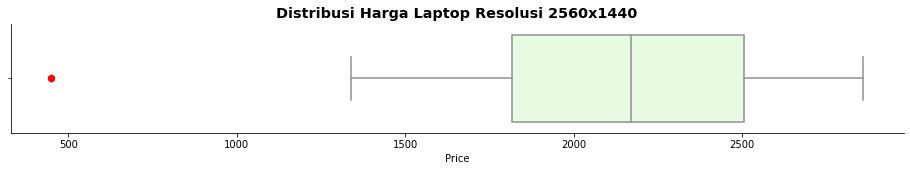

In [76]:
plt.figure(figsize=(16,2))
sns.boxplot(x='Price', data=df[df['Resolution'] == '2560x1440'], color='#E5FFDE')
sns.stripplot(x='Price', data=df[(df['Resolution'] == '2560x1440') & (df['Price'] < 1000)], color='Red', jitter=0, size=7.5)
plt.title('Distribusi Harga Laptop Resolusi 2560x1440')
sns.despine()

Laptop-laptop yang menggunakan resolusi 2560x1440 (Quad HD) memiliki rataan harga 2200 €. Akan tetapi, ada satu laptop yang memiliki harga jauh dibawah rataan harga tersebut (dibawah 500 €).

In [77]:
df[(df['Resolution'] == '2560x1440') & (df['Price'] < 1000)]

,Company,TypeName,Inches,Ram,OpSys,Weight,Resolution,IPS,Touchscreen,Cpu_GHz,Cpu_brand,Memory_1,SSD_1 (GB),HDD_1 (GB),Hybrid_1 (GB),Flash_1 (GB),Memory_2,Memory_2 (GB),Total_Memory (GB),Gpu_brand,Price
421,Chuwi,Notebook,12.5,6,Windows 10,1.4,2560x1440,1,0,1.1,Intel Celeron,Flash Storage,0,0,0,64,None,0,64,Intel Graphics,449.0


Dapat dilihat bahwa fitur yang digunakan oleh laptop ini adalah fitur dengan rataan harga yang relatif murah. Chuwi, brand yang mengeluarkan laptop ini memang memiliki rataan harga laptop yang murah pada dataset. Selain itu, fitur lain yang digunakan seperti CPU Intel Celeron dan GPU Intel Graphics merupakan fitur dengan harga yang murah juga. Ditambah lagi, tipe memori utama yang digunakan adalah Flash Storage dengan ukuran hanya 64 GB. Tidak mengherankan kalau harga laptop ini jauh lebih murah dibandingkan laptop dengan resolusi 2560x1440 lainnya. Maka dari itu, untuk sementara laptop ini tidak akan dibuang dari dataset.

In [79]:
df.reset_index(drop=True, inplace=True)

## Features Correlations

In [80]:
df_corr = df.copy()

In [81]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df_corr.columns:
    if df_corr[col].dtype == 'O':
        df_corr[col] = le.fit_transform(df_corr[col])

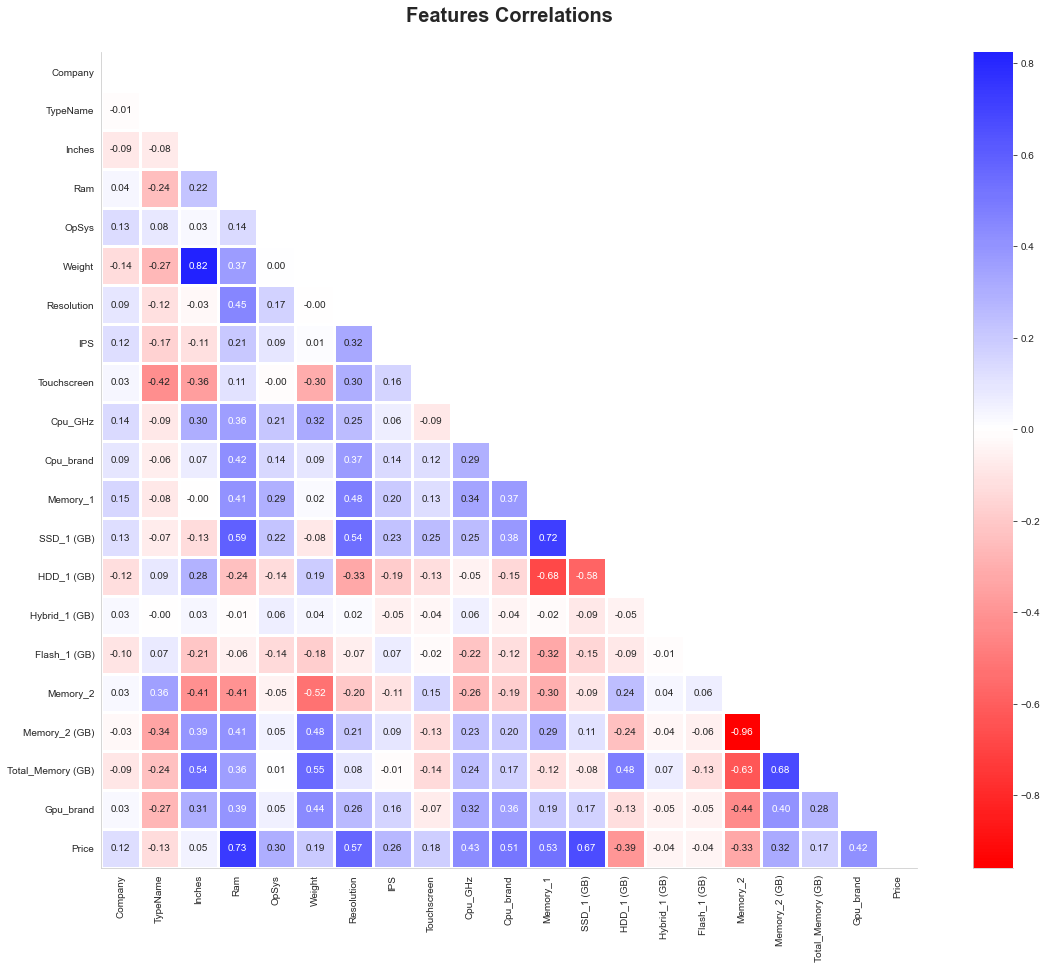

In [82]:
mask = np.zeros_like(df_corr.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style('whitegrid')
plt.subplots(figsize=(20,15))
sns.heatmap(df_corr.corr(),
           annot=True,
           mask=mask,
           cmap='bwr_r',
           linewidths=1.2,
           linecolor='white',
           fmt='.2f',
           center=0,
           square=True)
plt.title('Features Correlations', y=1.03, size=20);
sns.despine()

**Key Points:**
- **Positive Correlation Features:**
    - `Price & Ram: 0.73`
    <br>Ukuran RAM memiliki korelasi positif tertinggi terhadap harga laptop. Secara teori, semakin besar ukuran RAM maka semakin cepat dan responsif juga performa laptop, sehingga semakin mahal juga harga laptop tersebut.
    - `Price & SSD_1 (GB): 0.67`
    <br>Semakin besar ukuran memori utama SSD laptop maka semakin besar juga kapasitas penyimpanan data di laptop tersebut. Besarnya kapasitas penyimpanan data ini juga cukup mempengaruhi harga laptop.
    - `Price & Resolution: 0.57`
    <br>Secara teori, semakin tinggi resolusi layar maka semakin jernih dan tajam tampilan pada laptop tersebut. Tidak mengherankan jika semakin tinggi resolusi maka semakin mahal juga harga laptop tersebut.
    - `Price & Memory_1: 0.53`
    <br>Berdasarkan analisa sebelumnya diketahui bahwa harga laptop dengan memori SSD cenderung akan lebih mahal dibandingkan memori lainnya.
    - `Price & Cpu_brand: 0.51`
    <br>Selain RAM, CPU juga mempengaruhi kecepatan dan respon dari sebuah laptop. Seperti yang diketahui dari analisis sebelumnya, terdapat beberapa brand CPU yang lebih mahal dibandingkan brand lainnya.
   
   
- **Negative Correlation Features:**
    - `Price & HDD_1 (GB): -0.39`
    <br>Secara teori, kecepatan transfer data dan respon dari memori HDD kalah dibandingkan memori SSD. Maka dari itu, apabila laptop menggunakan HDD sebagai memori utama, seharusnya harga laptop tersebut relatif lebih murah.

## Modeling

In [88]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

seed=15

In [83]:
## checkpoint
df_model = df.copy()

### Standardization

In [84]:
X = df_model.drop("Price", axis=1)
y = df_model["Price"]

In [86]:
cat_cols = X.select_dtypes(['O']).columns.tolist()
num_cols = [cols for cols in X.columns.tolist() if cols not in cat_cols]

In [89]:
## remove binary features
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

### One-Hot Encoding

In [90]:
X = pd.get_dummies(X, columns=cat_cols)

### Train-Test Split

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)

### Define Evaluation

Salah satu metric yang akan digunakan dalam mengevaluasi model adalah root-mean-squared logarithmic error (RMSLE). Semakin kecil nilai RMSLE maka semakin baik score dari model. RMSLE digunakan karena dataset memiliki beberapa harga laptop yang jauh dari rataan harga laptop (skewness distribution).

In [92]:
from sklearn.metrics import mean_squared_log_error, make_scorer, mean_squared_error, r2_score

def funct(y_true,y_pred):
    y_new = np.maximum(y_pred,np.zeros(len(y_pred)))
    t = mean_squared_log_error(y_true,y_new)
    return np.sqrt(t)

RMSLE = make_scorer(funct, greater_is_better=False)

### Model

- ### Linear Regression (Ridge)

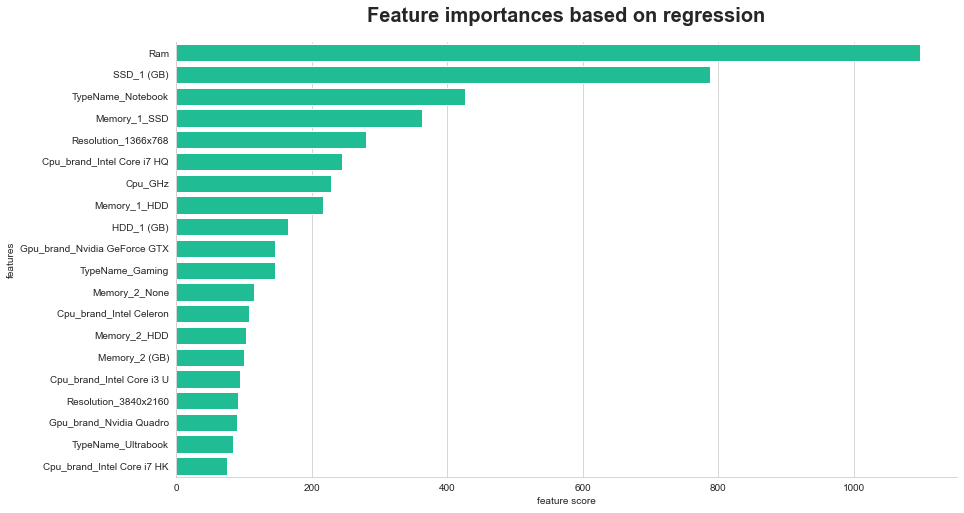

In [104]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
fs = SelectKBest(score_func=f_regression, k='all')
fs.fit(X_train,y_train)
indices = np.argsort(fs.scores_)[::-1]
cc = pd.DataFrame({'feature score':pd.Series(fs.scores_),'features':pd.Series(X_train.columns)})    
plt.figure(figsize=(14,8))
sns.barplot(x='feature score',y='features',data=cc.sort_values(by='feature score',ascending=False).head(20), color='#06D6A0')
plt.title('Feature importances based on regression', size=20, pad=20)
sns.despine()

Dari model ini, beberapa variabel yang paling berpengaruh dalam memprediksi harga laptop adalah: 
- RAM
- Ukuran memori SSD
- Tipe Notebook
- Tipe memori utama SSD
- Resolusi 1366x768

In [98]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pipe = Pipeline([("scaler", StandardScaler()),("reg", Ridge())])
param_grid = {'reg__alpha': [100, 200, 250, 300, 350, 400, 500]}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring=RMSLE)
grid.fit(X_train,y_train)
print('Best hyperparameter: ', grid.best_params_)
print('Best cross validation score: ', -grid.best_score_)

Best hyperparameter:  {'reg__alpha': 300}
Best cross validation score:  0.2654979072204696


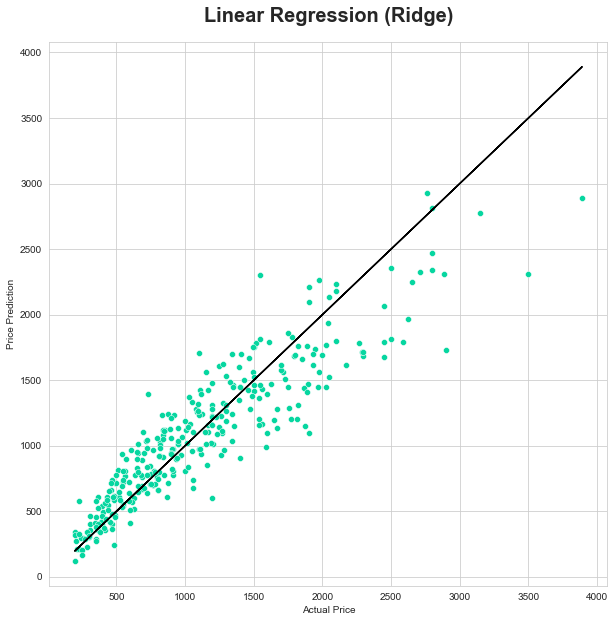

In [109]:
y_true = (y_test)
y_pred_ridge = (grid.predict(X_test))
plt.figure(figsize=(10,10))
sns.scatterplot(y_true,y_pred_ridge, color='#06D6A0')
plt.plot(y_true,y_true,color='k')
plt.title('Linear Regression (Ridge)', size=20, pad=20)
plt.xlabel('Actual Price')
plt.ylabel('Price Prediction');

In [110]:
mse_ridge = mean_squared_error(y_true, y_pred_ridge)
print("RMSE using Ridge: {} Euro ".format(np.round(np.sqrt(mse_ridge)),4))
print("R2 using Ridge: {:.2f} %".format(np.round(r2_score(y_true, y_pred_ridge),4)*100))

RMSE using Ridge: 280.0 Euro 
R2 using Ridge: 82.07 %


- ### Extra Tree Regressor

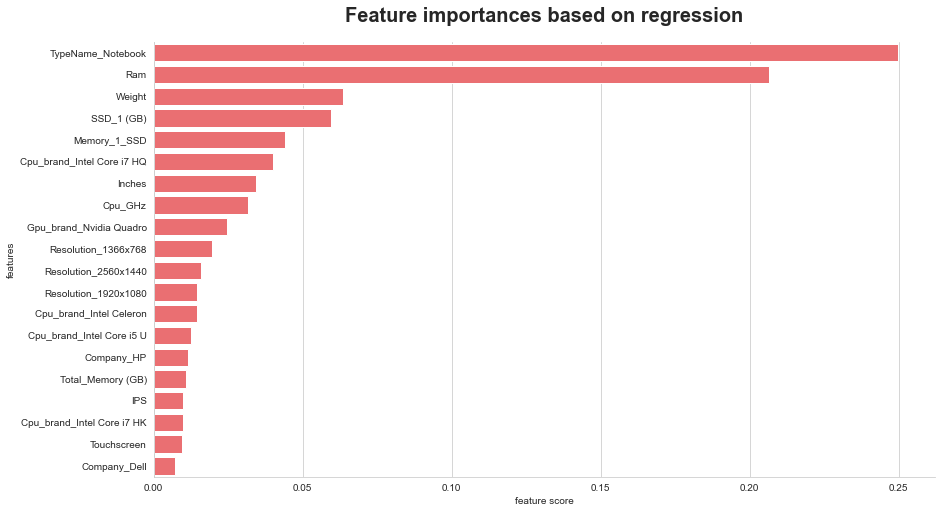

In [112]:
from sklearn.ensemble import ExtraTreesRegressor
forest = ExtraTreesRegressor(n_estimators=100,
                              random_state=0,n_jobs=4)
forest.fit(X_train, y_train)
indices = np.argsort(forest.feature_importances_)[::-1]
cc = pd.DataFrame({'feature score':pd.Series(forest.feature_importances_),'features':pd.Series(X_train.columns)})    
plt.figure(figsize=(14,8))
sns.barplot(x='feature score',y='features',data=cc.sort_values(by='feature score',ascending=False).head(20), color='#FF5A5F')
plt.title('Feature importances based on regression', size=20, pad=20)
sns.despine()

Dari model ini, beberapa variabel yang paling berpengaruh dalam memprediksi harga laptop adalah:


- Tipe Notebook
- RAM
- Berat laptop
- Ukuran memori SSD
- Tipe memori utama SSD

In [113]:
from sklearn.ensemble import ExtraTreesRegressor
forest = ExtraTreesRegressor(random_state=0,n_jobs=4,n_estimators=100)
param_grid = {'min_samples_split': [2, 3, 4], 'max_depth' : [20, 30, 40, 50]}
grid = GridSearchCV(forest, param_grid=param_grid, cv=5, scoring=RMSLE)
grid.fit(X_train,y_train)
print('Best hyperparameter: ', grid.best_params_)
print('Best cross validation score: ', -grid.best_score_)

Best hyperparameter:  {'max_depth': 40, 'min_samples_split': 3}
Best cross validation score:  0.21604422969984763


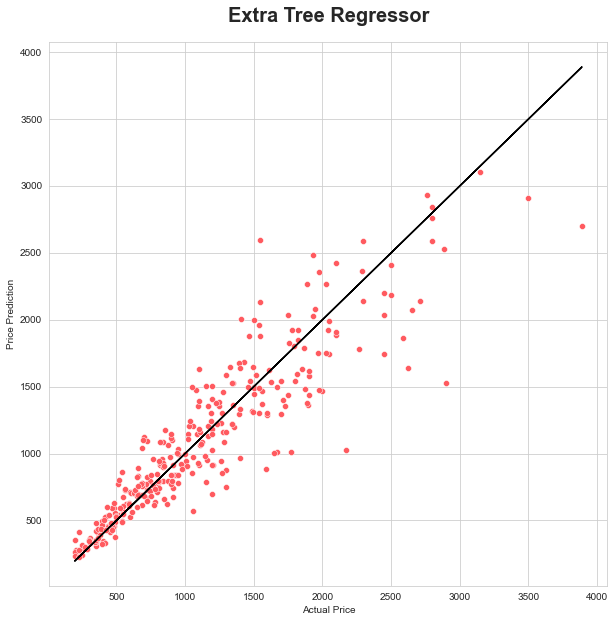

In [114]:
y_true = (y_test)
y_pred_xtree = (grid.predict(X_test))
plt.figure(figsize=(10,10))
sns.scatterplot(y_true,y_pred_xtree, color='#FF5A5F')
plt.plot(y_true,y_true,color='k')
plt.title('Extra Tree Regressor', size=20, pad=20)
plt.xlabel('Actual Price')
plt.ylabel('Price Prediction');

In [115]:
mse_xtree = mean_squared_error(y_true, y_pred_xtree)
print("RMSE using Extra Tree Regressor: {} Euro ".format(np.round(np.sqrt(mse_xtree)),4))
print("R2 using Extra Tree Regressor: {:.2f} %".format(np.round(r2_score(y_true, y_pred_xtree),4)*100))

RMSE using Extra Tree Regressor: 267.0 Euro 
R2 using Extra Tree Regressor: 83.64 %


### Gradient Boosting Regressor

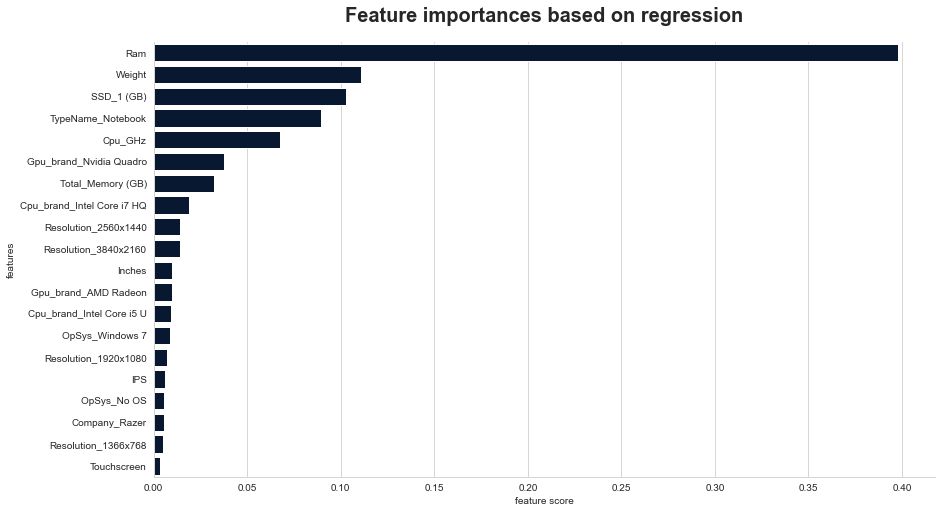

In [117]:
from sklearn.ensemble import GradientBoostingRegressor
gdb = GradientBoostingRegressor(n_estimators = 300, random_state=0)
gdb.fit(X_train,y_train)
indices = np.argsort(gdb.feature_importances_)[::-1]
cc = pd.DataFrame({'feature score':pd.Series(gdb.feature_importances_),'features':pd.Series(X.columns)})    
plt.figure(figsize=(14,8))
sns.barplot(x='feature score',y='features',data=cc.sort_values(by='feature score',ascending=False).head(20), color='#011638')
plt.title('Feature importances based on regression', size=20, pad=20)
sns.despine()

Dari model ini, beberapa variabel yang paling berpengaruh dalam memprediksi harga laptop adalah: 


- RAM
- Berat laptop
- Ukuran memori SSD
- Tipe Notebook
- Kecepatan processor CPU

In [118]:
from sklearn.ensemble import GradientBoostingRegressor
gdb = GradientBoostingRegressor(random_state=0, n_estimators=400)
param_grid = {'min_samples_split' : [15, 20, 25, 30, 35], 'min_samples_leaf' : [2, 3, 4, 5]}
grid = GridSearchCV(gdb, param_grid=param_grid, cv=5, scoring=RMSLE)
grid.fit(X_train,y_train)
print('Best hyperparameter: ', grid.best_params_)
print('Best cross validation score: ', -grid.best_score_)

Best hyperparameter:  {'min_samples_leaf': 2, 'min_samples_split': 15}
Best cross validation score:  0.20571070757318277


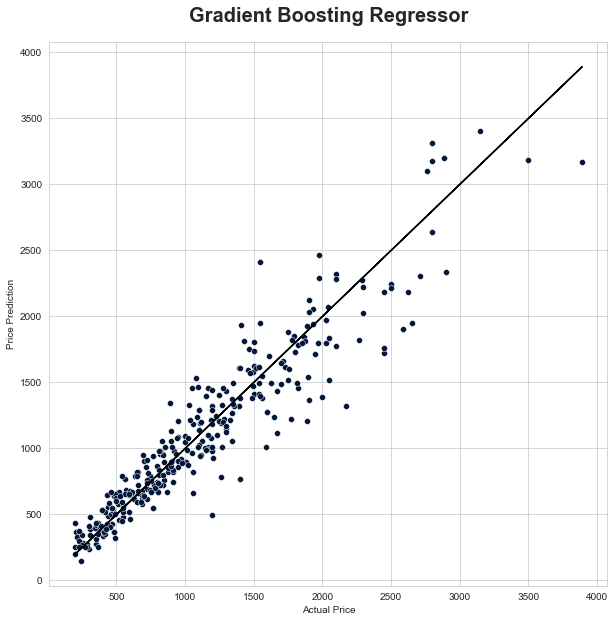

In [119]:
y_true = (y_test)
y_pred_gboost = (grid.predict(X_test))
plt.figure(figsize=(10,10))
sns.scatterplot(y_true,y_pred_gboost, color='#011638')
plt.plot(y_true,y_true,color='k')
plt.title('Gradient Boosting Regressor', size=20, pad=20)
plt.xlabel('Actual Price')
plt.ylabel('Price Prediction');

In [120]:
mse_gradboost = mean_squared_error(y_true, y_pred_gboost)
print("RMSE using Gradient Boost: {} Euro ".format(np.round(np.sqrt(mse_gradboost)),4))
print("R2 using Gradient Boost: {:.2f} %".format(np.round(r2_score(y_true, y_pred_gboost),4)*100))

RMSE using Gradient Boost: 225.0 Euro 
R2 using Gradient Boost: 88.43 %


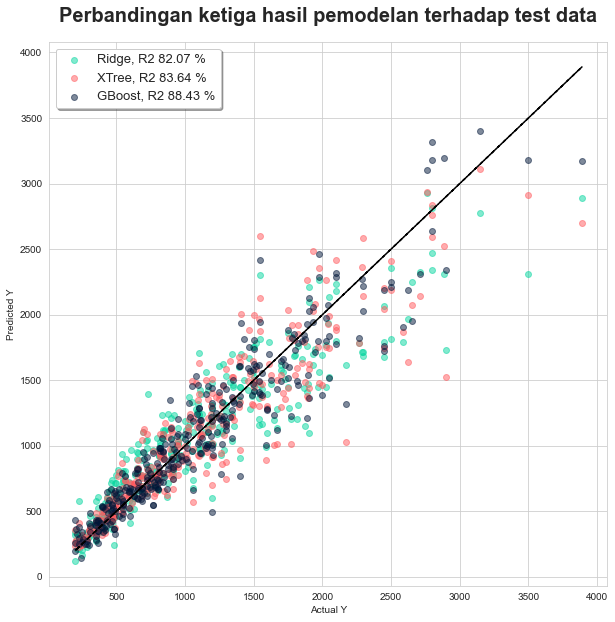

In [122]:
plt.figure(figsize = (10,10))
plt.scatter(y_test, y_pred_ridge, alpha=0.5, color='#06D6A0',label='Ridge, R2 {:.2f} %'.format(r2_score(y_test, y_pred_ridge)*100))
plt.scatter(y_test, y_pred_xtree, alpha=0.5, color='#FF5A5F',label='XTree, R2 {:.2f} %'.format(r2_score(y_test, y_pred_xtree)*100))
plt.scatter(y_test, y_pred_gboost, alpha=0.5, color='#011638',label='GBoost, R2 {:.2f} %'.format(r2_score(y_test, y_pred_gboost)*100))
plt.plot(y_test,y_test, linestyle='--', color='k')
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.title('Perbandingan ketiga hasil pemodelan terhadap test data', size=20, pad=20)
plt.legend(loc='upper left', ncol=1, fontsize=13, fancybox=True, shadow=True, frameon=True)
plt.show()

Dari ketiga pemodelan yang dilakukan untuk memprediksi harga laptop, model Gradient Boosting memiliki score RMSLE, RMSE, dan R2 yang terbaik dibandingkan model lainnya. 

Dari model ini, lima fitur utama yang paling berpengaruh pada prediksi harga laptop adalah:
- RAM
- Berat laptop
- Ukuran memori SSD
- Tipe Notebook
- Kecepatan processor CPU